<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif" data-toc-modified-id="Objectif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Import-data-et-Prise-en-Main-Dataset" data-toc-modified-id="Import-data-et-Prise-en-Main-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data et Prise en Main Dataset</a></span></li><li><span><a href="#Manipulation-de-data" data-toc-modified-id="Manipulation-de-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manipulation de data</a></span></li><li><span><a href="#Stationarité" data-toc-modified-id="Stationarité-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationarité</a></span></li><li><span><a href="#Split-le-data-set" data-toc-modified-id="Split-le-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Split le data set</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Comment-faire-le-split" data-toc-modified-id="Comment-faire-le-split-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Comment faire le split</a></span></li></ul></li><li><span><a href="#Boostraping" data-toc-modified-id="Boostraping-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Boostraping</a></span></li><li><span><a href="#Split-consigne" data-toc-modified-id="Split-consigne-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Split consigne</a></span><ul class="toc-item"><li><span><a href="#Couper-le-data-set-en-deux-en-fonction-de-sa-taille" data-toc-modified-id="Couper-le-data-set-en-deux-en-fonction-de-sa-taille-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Couper le data set en deux en fonction de sa taille</a></span><ul class="toc-item"><li><span><a href="#Un-train_set-avec-les-70%-premières-valeurs" data-toc-modified-id="Un-train_set-avec-les-70%-premières-valeurs-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Un train_set avec les 70% premières valeurs</a></span></li><li><span><a href="#Un-test_set-avec-les-30%-restantes" data-toc-modified-id="Un-test_set-avec-les-30%-restantes-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Un test_set avec les 30% restantes</a></span></li></ul></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Préparation-de-données-pour-le-MLP" data-toc-modified-id="Préparation-de-données-pour-le-MLP-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Préparation de données pour le MLP</a></span></li><li><span><a href="#Save-Data" data-toc-modified-id="Save-Data-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Save Data</a></span></li></ul></div>

## Objectif
L'objectif de ce cours est de se familiariser avec les séries temporelles. 
- Qu'est ce que c'est? 
- Comment les manipuler? 
- Gérer des données manquantes? 
- Faire des plots

==> correction publié à la fin du cours

## Import
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Import data et Prise en Main Dataset
- (1) Importez les donées en utilisant **pd.read_csv**
- (2) Affichez le nombre pays disponibles
- (3) Affichez le nombre de jours et années couvert par le dataset
    - Tips: utiliser la fonction **pd.to_datetime()**
- (4) Changer la forme de la dataframe en ayant la date (dt) en index, les Temperatures moyennes (AverageTemperature) en valeurs et les pays (Country) en column
    - Tips: utiliser la fonction **pd.pivot()**
    
- (5) Selectionner uniquement les pays suivants: France, Germany, Belgium, United Kingdom, United States, Argentina

In [292]:
directory = "/Users/mc/Documents/Cours/archive/GlobalLandTemperaturesByCountry.csv"

## Import
df = pd.read_csv(directory)
df['Country'].nunique()
df.Country.nunique()



243

In [293]:
## Changer la forme de la dataframe 
df = df.pivot(index="dt", values="AverageTemperature", columns="Country")
df

Country     Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
dt                                                                           
1743-11-01          NaN     NaN    8.620      NaN             NaN    7.556   
1743-12-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-01-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-02-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-03-01          NaN     NaN      NaN      NaN             NaN      NaN   
...                 ...     ...      ...      ...             ...      ...   
2013-05-01       21.355  26.671   18.355   28.482          28.045   11.910   
2013-06-01       26.879  26.324   21.070   32.288          27.650   17.010   
2013-07-01       28.205  25.856   23.591   34.707          26.902   22.003   
2013-08-01       26.031  25.911   24.793   33.234          27.000   20.795   
2013-09-01          NaN     NaN      NaN      NaN             NaN      NaN   

Country     Angola  Anguilla  Antarctica  Antigua And Barbuda  ...  Uruguay  \
dt                                                             ...            
1743-11-01     NaN       NaN         NaN                  NaN  ...      NaN   
1743-12-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-01-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-02-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-03-01     NaN       NaN         NaN                  NaN  ...      NaN   
...            ...       ...         ...                  ...  ...      ...   
2013-05-01  21.861    27.667         NaN               27.706  ...   14.345   
2013-06-01  20.103    28.414         NaN               28.322  ...   12.032   
2013-07-01  19.656    28.904         NaN               28.712  ...   11.464   
2013-08-01  21.577    29.235         NaN               28.978  ...   11.490   
2013-09-01     NaN       NaN         NaN                  NaN  ...      NaN   

Country     Uzbekistan  Venezuela  Vietnam  Virgin Islands  Western Sahara  \
dt                                                                           
1743-11-01         NaN        NaN      NaN             NaN             NaN   
1743-12-01         NaN        NaN      NaN             NaN             NaN   
1744-01-01         NaN        NaN      NaN             NaN             NaN   
1744-02-01         NaN        NaN      NaN             NaN             NaN   
1744-03-01         NaN        NaN      NaN             NaN             NaN   
...                ...        ...      ...             ...             ...   
2013-05-01      21.612     26.253   27.443          27.493          24.935   
2013-06-01      26.635     25.674   27.623          28.021          26.356   
2013-07-01      28.440     25.449   27.109          28.630          27.916   
2013-08-01      26.185     25.626   27.026          29.147          28.564   
2013-09-01         NaN        NaN      NaN          28.991             NaN   

Country      Yemen  Zambia  Zimbabwe   Åland  
dt                                            
1743-11-01     NaN     NaN       NaN   4.384  
1743-12-01     NaN     NaN       NaN     NaN  
1744-01-01     NaN     NaN       NaN     NaN  
1744-02-01     NaN     NaN       NaN     NaN  
1744-03-01     NaN     NaN       NaN     NaN  
...            ...     ...       ...     ...  
2013-05-01  31.173  20.045    19.059  10.327  
2013-06-01  32.325  18.703    17.613  14.068  
2013-07-01  31.340  18.266    17.000  16.447  
2013-08-01  30.833  20.887    19.759  16.425  
2013-09-01     NaN     NaN       NaN     NaN  

[3239 rows x 243 columns]

<AxesSubplot:xlabel='dt'>

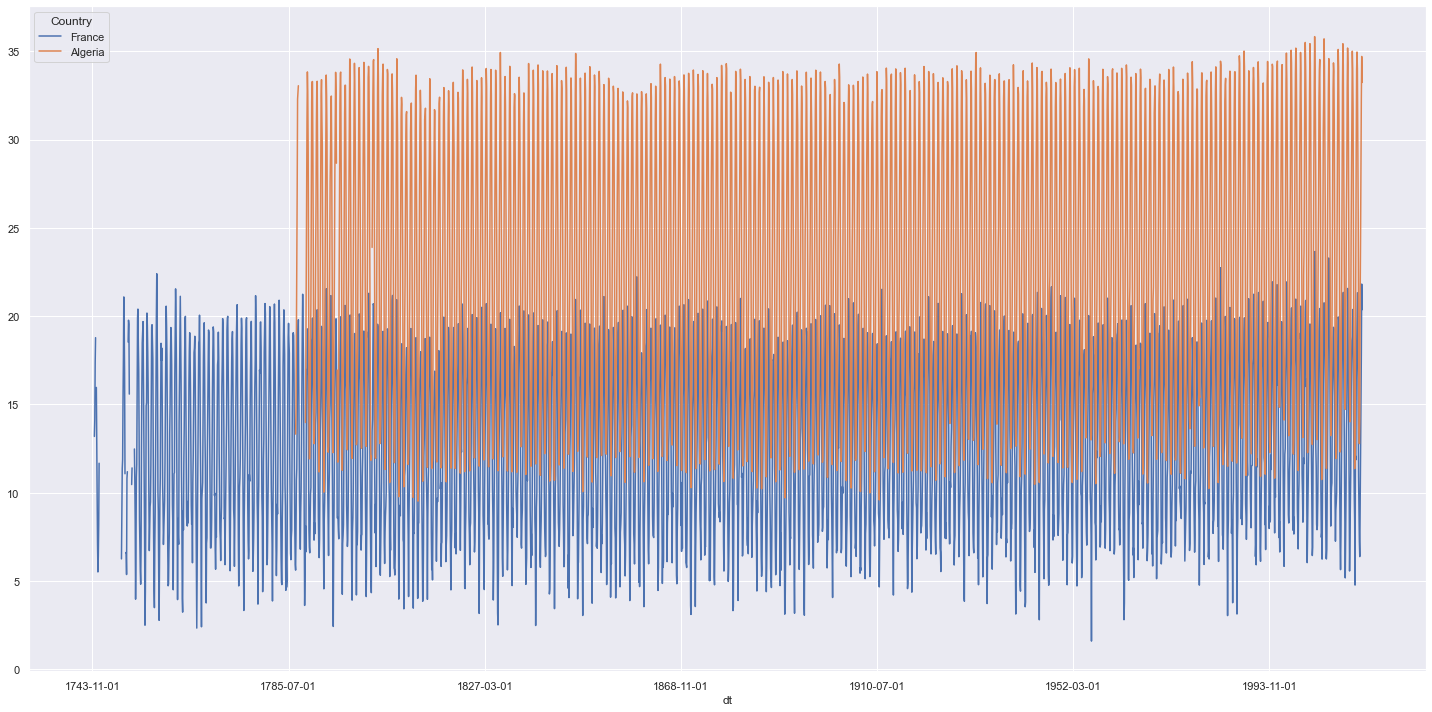

In [294]:
df[['France', "Algeria"]].plot()

In [295]:
df

Country     Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
dt                                                                           
1743-11-01          NaN     NaN    8.620      NaN             NaN    7.556   
1743-12-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-01-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-02-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-03-01          NaN     NaN      NaN      NaN             NaN      NaN   
...                 ...     ...      ...      ...             ...      ...   
2013-05-01       21.355  26.671   18.355   28.482          28.045   11.910   
2013-06-01       26.879  26.324   21.070   32.288          27.650   17.010   
2013-07-01       28.205  25.856   23.591   34.707          26.902   22.003   
2013-08-01       26.031  25.911   24.793   33.234          27.000   20.795   
2013-09-01          NaN     NaN      NaN      NaN             NaN      NaN   

Country     Angola  Anguilla  Antarctica  Antigua And Barbuda  ...  Uruguay  \
dt                                                             ...            
1743-11-01     NaN       NaN         NaN                  NaN  ...      NaN   
1743-12-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-01-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-02-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-03-01     NaN       NaN         NaN                  NaN  ...      NaN   
...            ...       ...         ...                  ...  ...      ...   
2013-05-01  21.861    27.667         NaN               27.706  ...   14.345   
2013-06-01  20.103    28.414         NaN               28.322  ...   12.032   
2013-07-01  19.656    28.904         NaN               28.712  ...   11.464   
2013-08-01  21.577    29.235         NaN               28.978  ...   11.490   
2013-09-01     NaN       NaN         NaN                  NaN  ...      NaN   

Country     Uzbekistan  Venezuela  Vietnam  Virgin Islands  Western Sahara  \
dt                                                                           
1743-11-01         NaN        NaN      NaN             NaN             NaN   
1743-12-01         NaN        NaN      NaN             NaN             NaN   
1744-01-01         NaN        NaN      NaN             NaN             NaN   
1744-02-01         NaN        NaN      NaN             NaN             NaN   
1744-03-01         NaN        NaN      NaN             NaN             NaN   
...                ...        ...      ...             ...             ...   
2013-05-01      21.612     26.253   27.443          27.493          24.935   
2013-06-01      26.635     25.674   27.623          28.021          26.356   
2013-07-01      28.440     25.449   27.109          28.630          27.916   
2013-08-01      26.185     25.626   27.026          29.147          28.564   
2013-09-01         NaN        NaN      NaN          28.991             NaN   

Country      Yemen  Zambia  Zimbabwe   Åland  
dt                                            
1743-11-01     NaN     NaN       NaN   4.384  
1743-12-01     NaN     NaN       NaN     NaN  
1744-01-01     NaN     NaN       NaN     NaN  
1744-02-01     NaN     NaN       NaN     NaN  
1744-03-01     NaN     NaN       NaN     NaN  
...            ...     ...       ...     ...  
2013-05-01  31.173  20.045    19.059  10.327  
2013-06-01  32.325  18.703    17.613  14.068  
2013-07-01  31.340  18.266    17.000  16.447  
2013-08-01  30.833  20.887    19.759  16.425  
2013-09-01     NaN     NaN       NaN     NaN  

[3239 rows x 243 columns]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


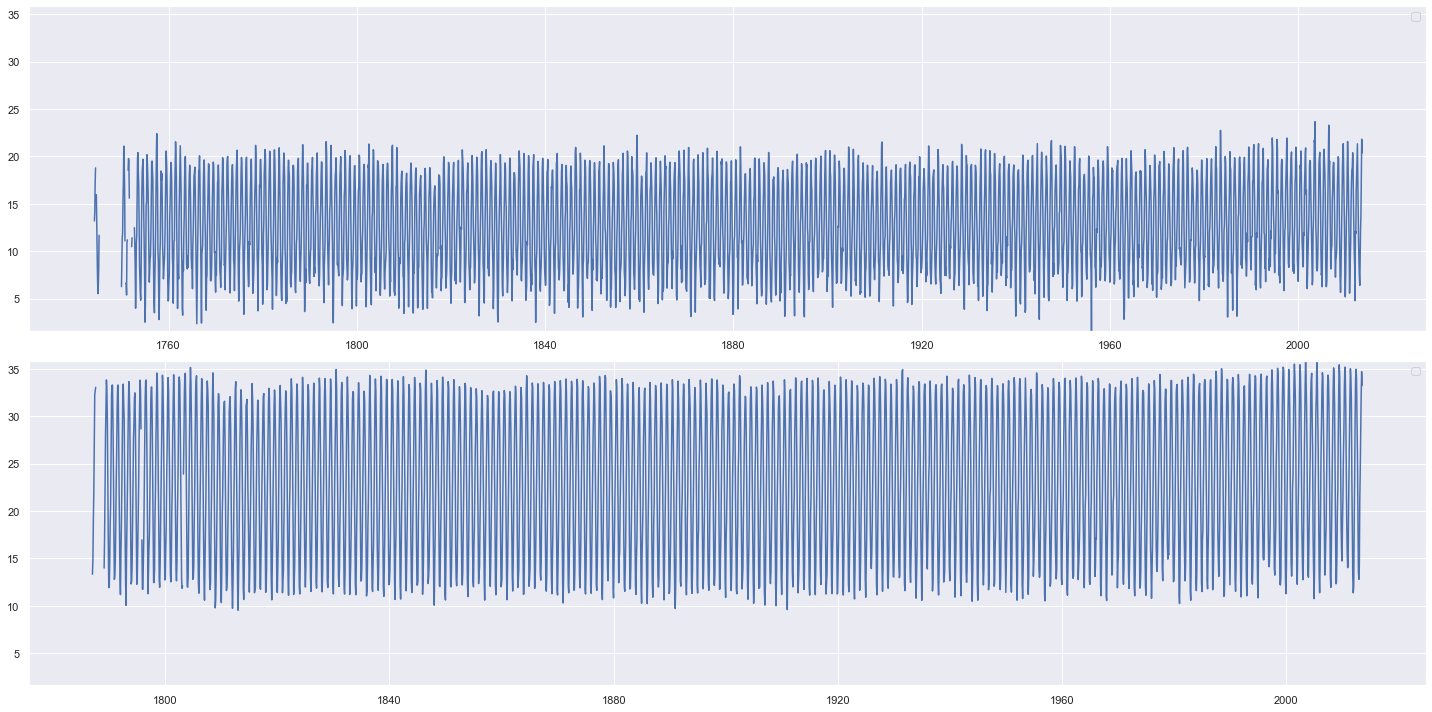

In [414]:
max_ = df[['France','Algeria']].max().max()
min_ = df[['France','Algeria']].min().min()

plt.subplot(211)
plt.plot(df.index, df['France'])
plt.ylim([min_, max_])
plt.legend()
plt.subplot(212)
plt.plot(df.index, df['Algeria'])
plt.ylim([min_, max_])
plt.legend()



In [298]:
directory = "/Users/mc/Documents/Cours/archive/GlobalLandTemperaturesByCountry.csv"

## Import
df = pd.read_csv("/Users/mc/Documents/Cours/archive/GlobalLandTemperaturesByCountry.csv")

## Nombre de pays disponible
nb_pays_dispo = df.Country.nunique()
print("Nombre de pays disponibles:", str(nb_pays_dispo))

## Nombre de jours/années couvert
df.dt = pd.to_datetime(df['dt'])
nb_jours = df.dt.max() - df.dt.min()
nb_années = nb_jours/365
print("Nombre de jours:", str(nb_jours))
print("Nombre d'anées:", str(nb_années))

## Changer la forme de la dataframe 
df = df.pivot(index="dt", values="AverageTemperature", columns="Country")

## Selection Pays
#df = df[['France', 'Germany', 'Belgium', 'United States', 'United Kingdom', 'Argentina']]

Nombre de pays disponibles: 243
Nombre de jours: 98555 days 00:00:00
Nombre d'anées: 270 days 00:19:43.561643836


In [173]:
df.describe()[df.describe().index=='25%']

Country  Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
25%            5.674   22.74  6.16225    16.17          26.167   6.0035   

Country    Angola  Anguilla  Antarctica  Antigua And Barbuda  ...   Uruguay  \
25%      20.69475  25.41675         NaN               25.325  ...  13.09525   

Country  Uzbekistan  Venezuela  Vietnam  Virgin Islands  Western Sahara  \
25%          2.1415   24.52325   21.057         25.1235         19.0875   

Country   Yemen    Zambia  Zimbabwe    Åland  
25%      22.736  19.52675    18.353 -0.45425  

[1 rows x 243 columns]

In [205]:
df

Country     Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
dt                                                                           
1743-11-01          NaN     NaN    8.620      NaN             NaN    7.556   
1743-12-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-01-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-02-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-03-01          NaN     NaN      NaN      NaN             NaN      NaN   
...                 ...     ...      ...      ...             ...      ...   
2013-05-01       21.355  26.671   18.355   28.482          28.045   11.910   
2013-06-01       26.879  26.324   21.070   32.288          27.650   17.010   
2013-07-01       28.205  25.856   23.591   34.707          26.902   22.003   
2013-08-01       26.031  25.911   24.793   33.234          27.000   20.795   
2013-09-01          NaN     NaN      NaN      NaN             NaN      NaN   

Country     Angola  Anguilla  Antarctica  Antigua And Barbuda  ...  Uruguay  \
dt                                                             ...            
1743-11-01     NaN       NaN         NaN                  NaN  ...      NaN   
1743-12-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-01-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-02-01     NaN       NaN         NaN                  NaN  ...      NaN   
1744-03-01     NaN       NaN         NaN                  NaN  ...      NaN   
...            ...       ...         ...                  ...  ...      ...   
2013-05-01  21.861    27.667         NaN               27.706  ...   14.345   
2013-06-01  20.103    28.414         NaN               28.322  ...   12.032   
2013-07-01  19.656    28.904         NaN               28.712  ...   11.464   
2013-08-01  21.577    29.235         NaN               28.978  ...   11.490   
2013-09-01     NaN       NaN         NaN                  NaN  ...      NaN   

Country     Uzbekistan  Venezuela  Vietnam  Virgin Islands  Western Sahara  \
dt                                                                           
1743-11-01         NaN        NaN      NaN             NaN             NaN   
1743-12-01         NaN        NaN      NaN             NaN             NaN   
1744-01-01         NaN        NaN      NaN             NaN             NaN   
1744-02-01         NaN        NaN      NaN             NaN             NaN   
1744-03-01         NaN        NaN      NaN             NaN             NaN   
...                ...        ...      ...             ...             ...   
2013-05-01      21.612     26.253   27.443          27.493          24.935   
2013-06-01      26.635     25.674   27.623          28.021          26.356   
2013-07-01      28.440     25.449   27.109          28.630          27.916   
2013-08-01      26.185     25.626   27.026          29.147          28.564   
2013-09-01         NaN        NaN      NaN          28.991             NaN   

Country      Yemen  Zambia  Zimbabwe   Åland  
dt                                            
1743-11-01     NaN     NaN       NaN   4.384  
1743-12-01     NaN     NaN       NaN     NaN  
1744-01-01     NaN     NaN       NaN     NaN  
1744-02-01     NaN     NaN       NaN     NaN  
1744-03-01     NaN     NaN       NaN     NaN  
...            ...     ...       ...     ...  
2013-05-01  31.173  20.045    19.059  10.327  
2013-06-01  32.325  18.703    17.613  14.068  
2013-07-01  31.340  18.266    17.000  16.447  
2013-08-01  30.833  20.887    19.759  16.425  
2013-09-01     NaN     NaN       NaN     NaN  

[3239 rows x 243 columns]

<AxesSubplot:xlabel='dt'>

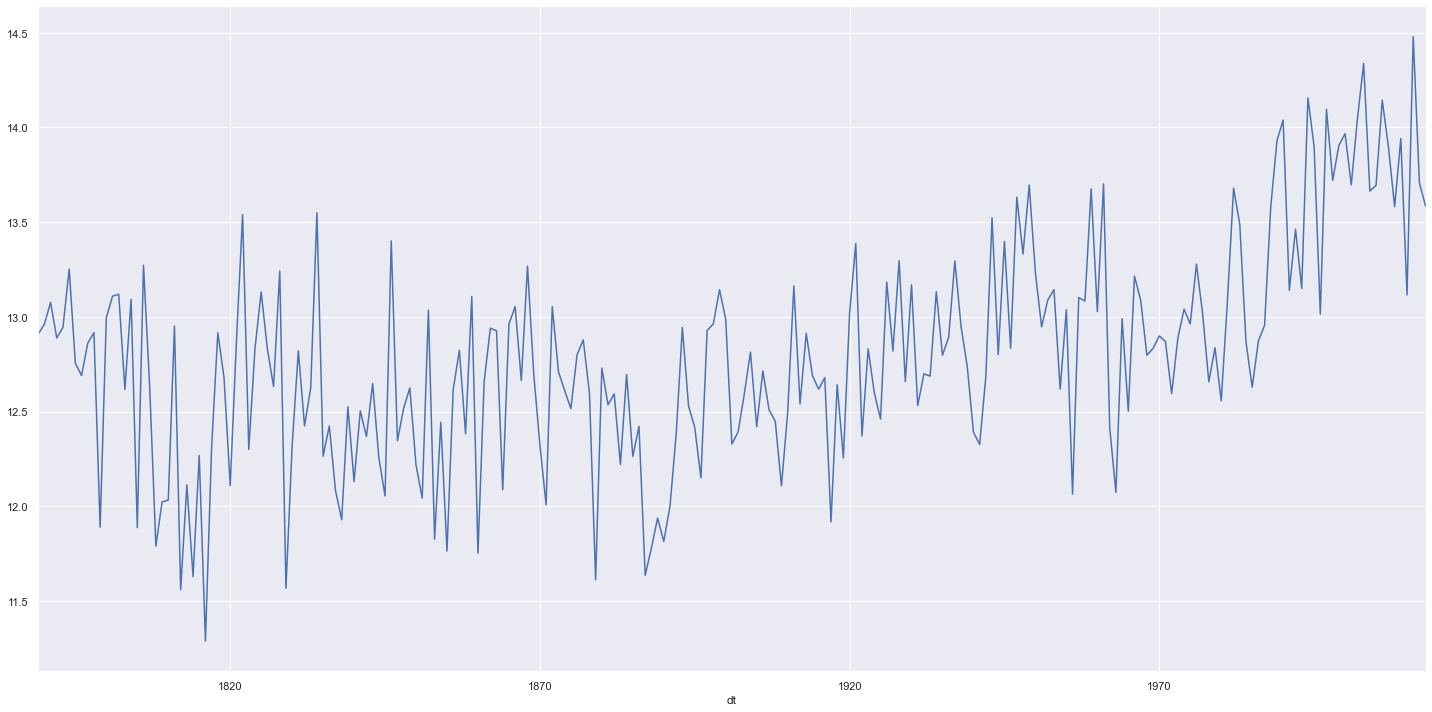

In [207]:
df[df.index>'1789-01-01']['France'].resample('Y').mean().dropna().plot()

<AxesSubplot:xlabel='dt'>

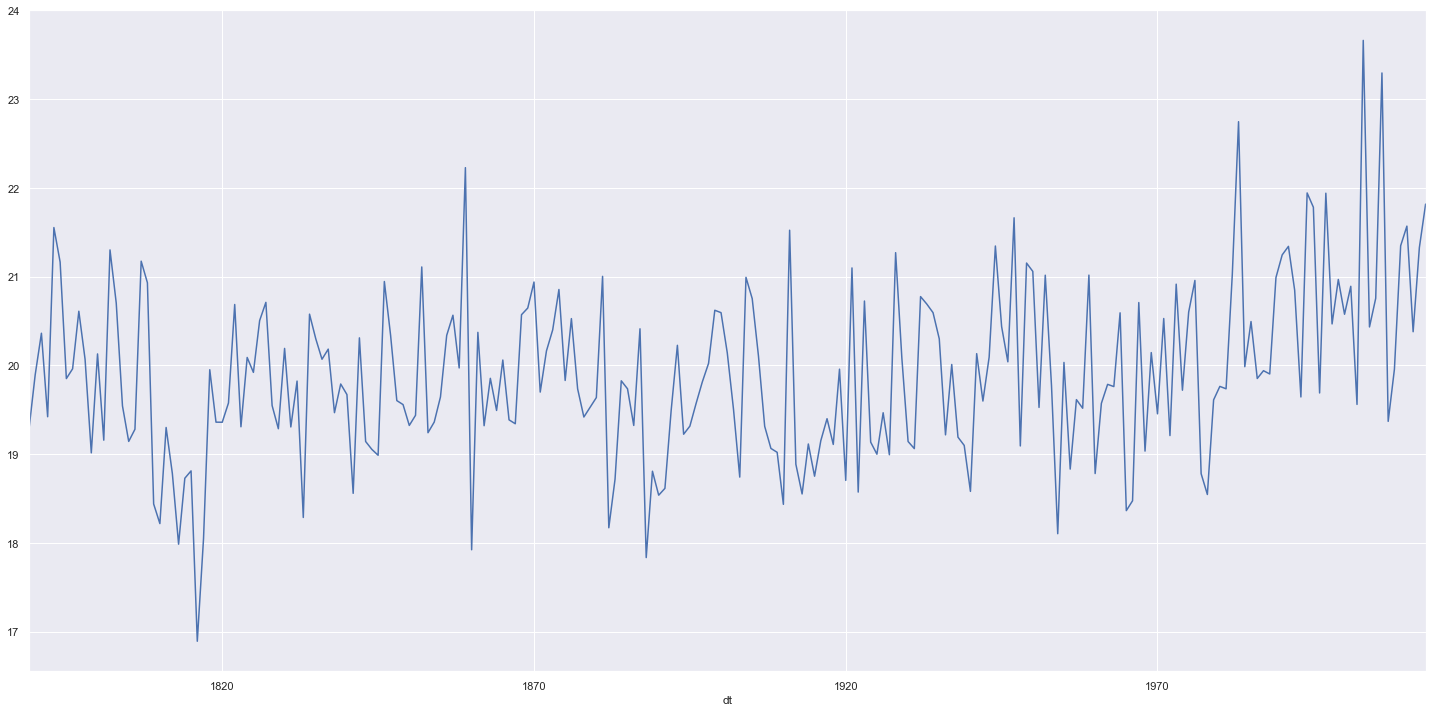

In [211]:
df[df.index>'1789-01-01']['France'].resample('Y').max().dropna().plot()

<AxesSubplot:xlabel='dt'>

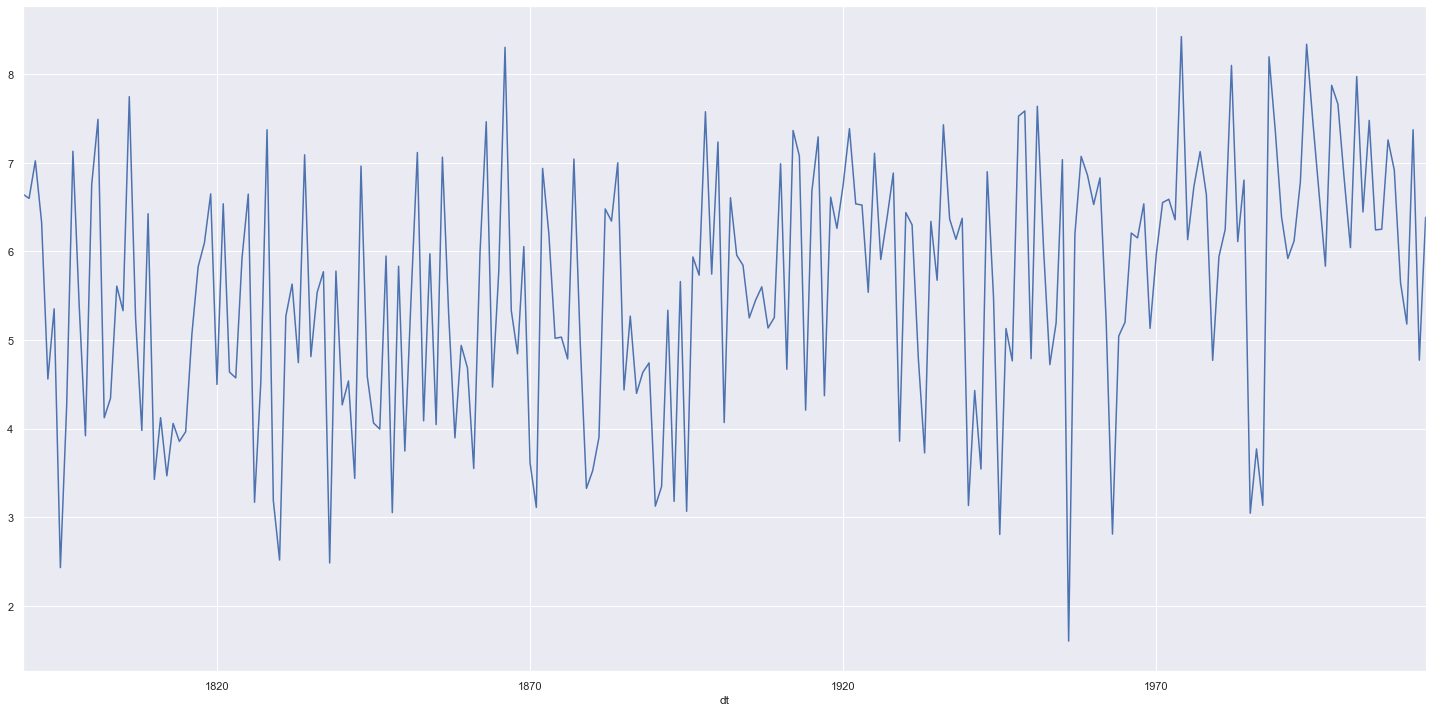

In [212]:
df[df.index>'1789-01-01']['France'].resample('Y').min().dropna().plot()

<BarContainer object of 1 artists>

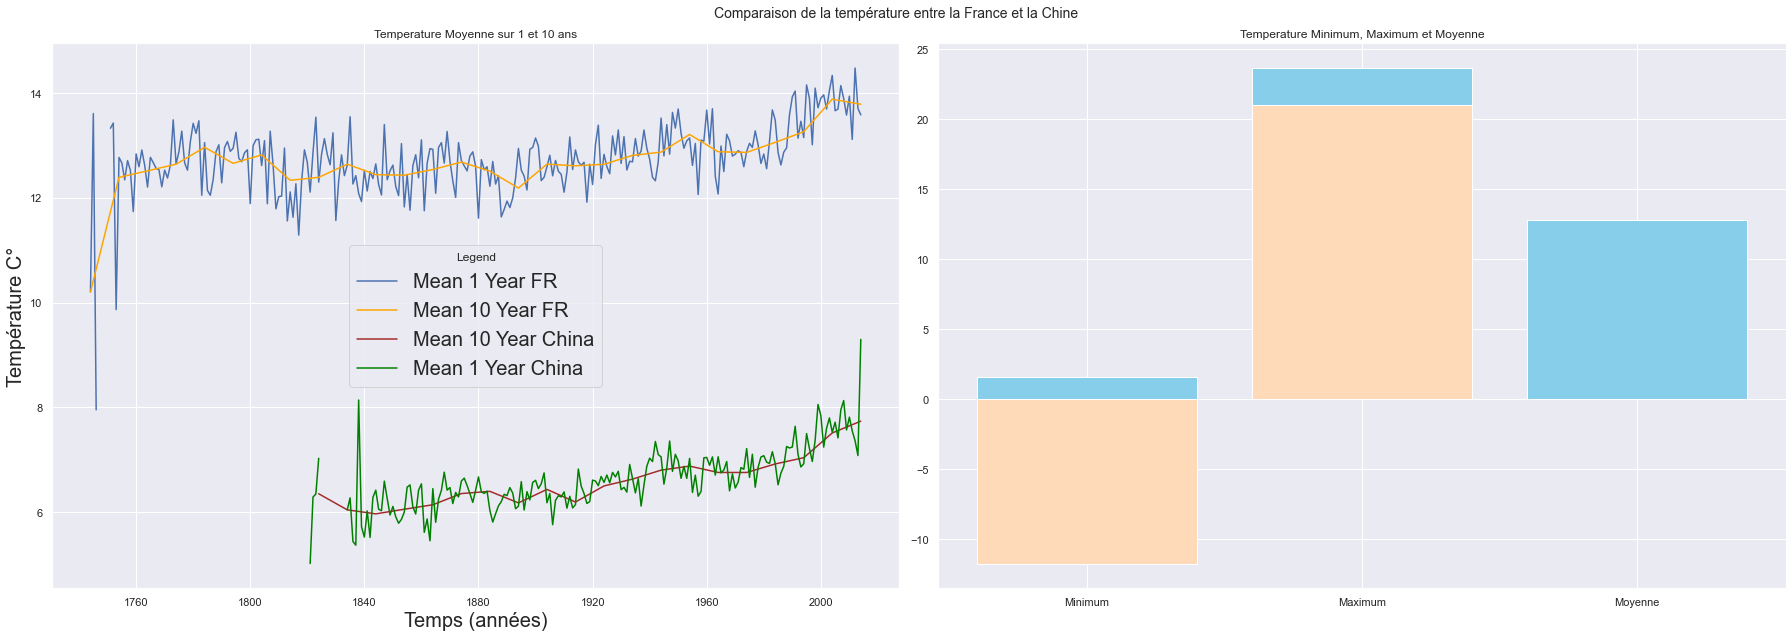

In [360]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))
fig.suptitle("Comparaison de la température entre la France et la Chine", fontsize=14)
ax1.set_title('Temperature Moyenne sur 1 et 10 ans')
ax1.plot(df['France'].resample('1Y').mean(),  label='Mean 1 Year FR')
ax1.plot(df['France'].resample('10Y').mean(), color='orange',  label='Mean 10 Year FR')
ax1.plot(df['China'].resample('10Y').mean(), color='brown',  label='Mean 10 Year China')
ax1.plot(df['China'].resample('1Y').mean(), color='green',  label='Mean 1 Year China')
ax1.set_xlabel("Temps (années)", fontsize=20)
ax1.set_ylabel("Température C°", fontsize=20)
ax1.legend(title='Legend', fontsize=20)


ax2.set_title('Temperature Minimum, Maximum et Moyenne')

ax2.bar('Minimum', df['France'].min(), color="skyblue", label="France")
ax2.bar('Maximum', df['France'].max(), color="skyblue")
ax2.bar('Moyenne', df['France'].mean(), color="skyblue")

ax2.bar('Minimum', df['China'].min(), color="peachpuff", label="China")
ax2.bar('Maximum', df['China'].max(), color="peachpuff")
#ax2.bar(

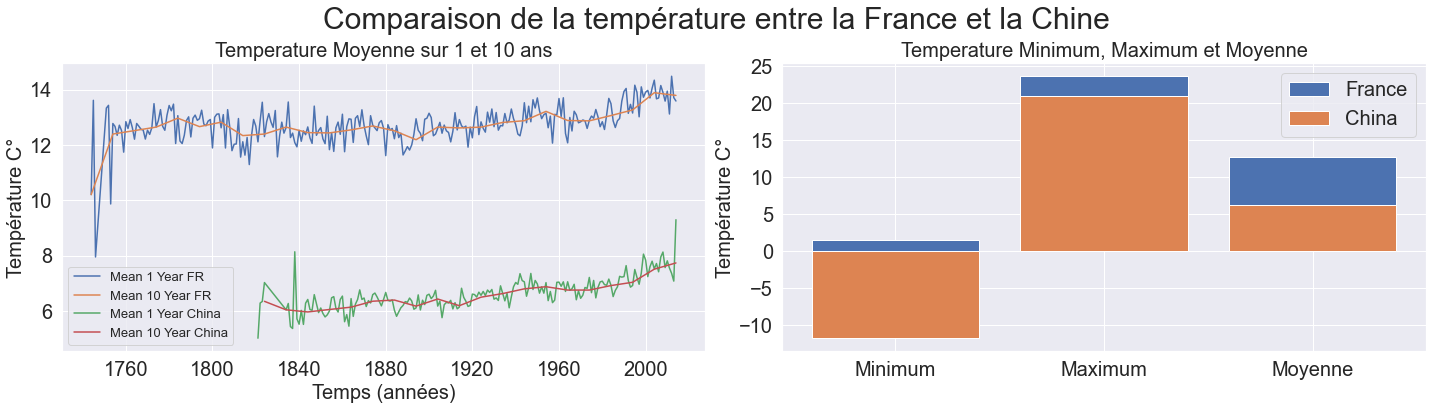

In [366]:

meanS = [df['France'].ffill().min(), df['France'].ffill().max(), df['France'].ffill().mean()]
plt.subplot(2,2,1)
plt.plot(df['France'].resample('Y').mean().dropna(), label = 'Mean 1 Year FR')
plt.plot(df['France'].resample('10Y').mean().dropna(), label = 'Mean 10 Year FR')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Température C°", fontsize=20)
plt.xlabel("Temps (années)", fontsize=20)
plt.title("Temperature Moyenne sur 1 et 10 ans",fontsize=20);
#plt.plot(df['France'].ffill(), label = 'fbfill')
plt.subplot(2,2,2)
p1 = plt.bar(['Minimum','Maximum', 'Moyenne'], meanS)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Température C°", fontsize=20)


meanS = [df['China'].ffill().min(), df['China'].ffill().max(), df['China'].ffill().mean()]
plt.subplot(2,2,1)
plt.plot(df['China'].resample('Y').mean().dropna(), label = 'Mean 1 Year China')
plt.plot(df['China'].resample('10Y').mean().dropna(), label = 'Mean 10 Year China')
plt.legend(fontsize=13, loc='lower left');
plt.subplot(2,2,2)
p2 = plt.bar(['Minimum','Maximum', 'Moyenne'], meanS)
plt.legend((p1[0], p2[0]), ('France', 'China'),fontsize=20);
plt.title("Temperature Minimum, Maximum et Moyenne",fontsize=20);
plt.suptitle("Comparaison de la température entre la France et la Chine",fontsize=30);


## Manipulation de data
- (1) Combien de données sont manquantes par pays?
- (2) Comblez les données en utilisant **ffill()** et **bfill()**
    - Verifiez le nombre de données manquantes
- (3) Même chose en essayant en utilisant **interpolate()**
    - Essayez différentes méthodes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html  
    
- (4) Supprimer les lignes contenant des valeurs manquantes
    - Tips: utiliser **dropna()**
    
- (5) Comparez la moyenne de toutes ces méthodes
- (6) Vérifier s'il y a des duplicata de données
    - Tips **duplicated()**

In [109]:
## Données manquantes 
print(df.isna().sum())
print("")

## Comblez les données ffill/bfill
df_1 = df.ffill().bfill()
print(df_1.isna().sum())

## Comblez les données interpolate
df_2 = df.interpolate(method = 'nearest')
print(df_2.isna().sum())

## Comblez les données interpolate 2
df_3 = df.interpolate(method = 'linear')
print(df_3.isna().sum())

## Drop na
df_4 = df.dropna()
print(df_4.isna().sum())


## Comparez la moyenne
df_m = pd.concat([df.mean(), df_1.mean(), df_2.mean(), df_3.mean(), df_4.mean()],1)
df_m

## Duplicata de données
print("Duplicata:", (df.duplicated(keep=False)*1).sum())
df_clean = df.drop_duplicates()
print("Duplicata:", (df_clean.duplicated(keep=False)*1).sum())

Country
France              73
Germany             73
Belgium             73
United States      757
United Kingdom      73
Argentina         1339
dtype: int64

Country
France            0
Germany           0
Belgium           0
United States     0
United Kingdom    0
Argentina         0
dtype: int64
Country
France               1
Germany              1
Belgium              1
United States      298
United Kingdom       1
Argentina         1339
dtype: int64
Country
France               0
Germany              0
Belgium              0
United States      298
United Kingdom       0
Argentina         1338
dtype: int64
Country
France            0
Germany           0
Belgium           0
United States     0
United Kingdom    0
Argentina         0
dtype: int64
Duplicata: 72
Duplicata: 0


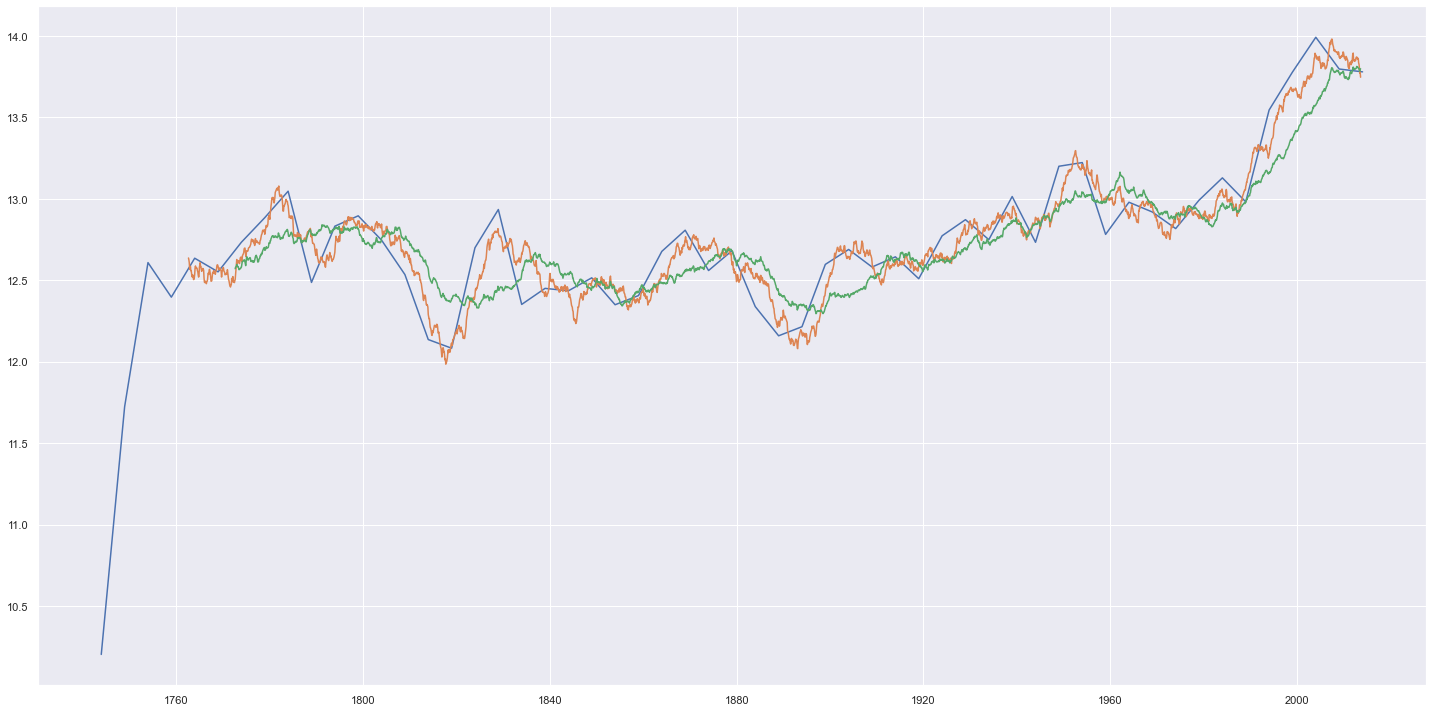

In [333]:
#plt.plot(df['France'])
plt.plot(df['France'].resample('20Q').mean())
plt.plot(df.rolling(window=12*10).mean()['France'])
plt.plot(df.rolling(window=12*20).mean()['France'])
#plt.plot(df.groupby(['Year']).mean()['France'])

In [330]:
df.groupby(['Year']).mean()['France']

Year
1743    10.203000
1744    13.610125
1745     7.949750
1746          NaN
1747          NaN
          ...    
2009    13.941667
2010    13.115417
2011    14.479583
2012    13.707167
2013    13.584625
Name: France, Length: 271, dtype: float64

In [326]:
df['Month'] = df.index.month
df['Year'] = df.index.year
df

Country     Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
dt                                                                           
1743-11-01          NaN     NaN    8.620      NaN             NaN    7.556   
1743-12-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-01-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-02-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-03-01          NaN     NaN      NaN      NaN             NaN      NaN   
...                 ...     ...      ...      ...             ...      ...   
2013-05-01       21.355  26.671   18.355   28.482          28.045   11.910   
2013-06-01       26.879  26.324   21.070   32.288          27.650   17.010   
2013-07-01       28.205  25.856   23.591   34.707          26.902   22.003   
2013-08-01       26.031  25.911   24.793   33.234          27.000   20.795   
2013-09-01          NaN     NaN      NaN      NaN             NaN      NaN   

Country     Angola  Anguilla  Antarctica  Antigua And Barbuda  ...  Venezuela  \
dt                                                             ...              
1743-11-01     NaN       NaN         NaN                  NaN  ...        NaN   
1743-12-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-01-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-02-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-03-01     NaN       NaN         NaN                  NaN  ...        NaN   
...            ...       ...         ...                  ...  ...        ...   
2013-05-01  21.861    27.667         NaN               27.706  ...     26.253   
2013-06-01  20.103    28.414         NaN               28.322  ...     25.674   
2013-07-01  19.656    28.904         NaN               28.712  ...     25.449   
2013-08-01  21.577    29.235         NaN               28.978  ...     25.626   
2013-09-01     NaN       NaN         NaN                  NaN  ...        NaN   

Country     Vietnam  Virgin Islands  Western Sahara   Yemen  Zambia  Zimbabwe  \
dt                                                                              
1743-11-01      NaN             NaN             NaN     NaN     NaN       NaN   
1743-12-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-01-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-02-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-03-01      NaN             NaN             NaN     NaN     NaN       NaN   
...             ...             ...             ...     ...     ...       ...   
2013-05-01   27.443          27.493          24.935  31.173  20.045    19.059   
2013-06-01   27.623          28.021          26.356  32.325  18.703    17.613   
2013-07-01   27.109          28.630          27.916  31.340  18.266    17.000   
2013-08-01   27.026          29.147          28.564  30.833  20.887    19.759   
2013-09-01      NaN          28.991             NaN     NaN     NaN       NaN   

Country      Åland  Month  Year  
dt                               
1743-11-01   4.384     11  1743  
1743-12-01     NaN     12  1743  
1744-01-01     NaN      1  1744  
1744-02-01     NaN      2  1744  
1744-03-01     NaN      3  1744  
...            ...    ...   ...  
2013-05-01  10.327      5  2013  
2013-06-01  14.068      6  2013  
2013-07-01  16.447      7  2013  
2013-08-01  16.425      8  2013  
2013-09-01     NaN      9  2013  

[3239 rows x 245 columns]

In [341]:
df[['France','Argentina','Month']].groupby(['Month']).mean()

Country     France  Argentina
Month                        
1         6.204679  21.246563
2         7.401265  20.399114
3         9.445932  18.195032
4        11.889357  14.279722
5        15.126103  10.835572
6        17.857193   7.996956
7        19.571201   7.746182
8        19.292471   9.467031
9        16.869114  12.133747
10       13.127289  15.044646
11        9.562068  18.081025
12        6.983228  20.170759

In [338]:
df_mean_M[['France', 'Argentina']]

Country     France  Argentina
Mois                         
1         6.204679  21.246563
2         7.401265  20.399114
3         9.445932  18.195032
4        11.889357  14.279722
5        15.126103  10.835572
6        17.857193   7.996956
7        19.571201   7.746182
8        19.292471   9.467031
9        16.869114  12.133747
10       13.127289  15.044646
11        9.562068  18.081025
12        6.983228  20.170759

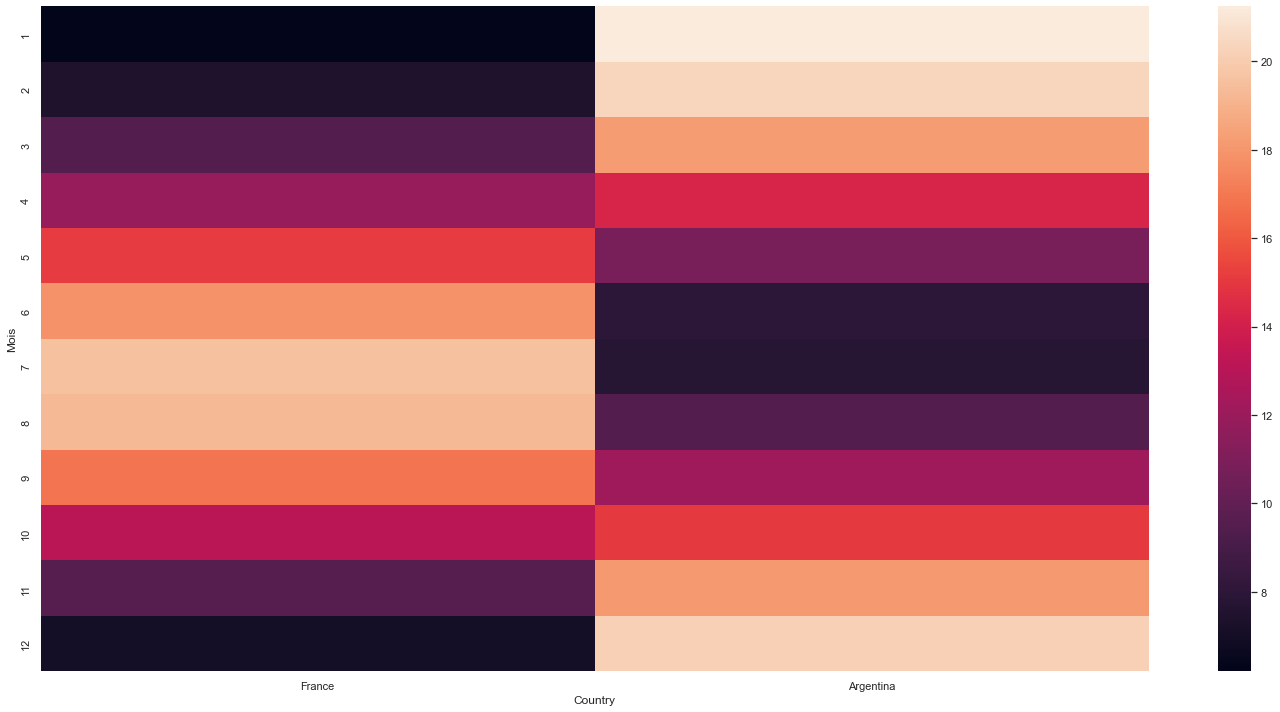

In [334]:
ax = sns.heatmap(df_mean_M[['France', 'Argentina']])

In [335]:
df

Country     Afghanistan  Africa  Albania  Algeria  American Samoa  Andorra  \
dt                                                                           
1743-11-01          NaN     NaN    8.620      NaN             NaN    7.556   
1743-12-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-01-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-02-01          NaN     NaN      NaN      NaN             NaN      NaN   
1744-03-01          NaN     NaN      NaN      NaN             NaN      NaN   
...                 ...     ...      ...      ...             ...      ...   
2013-05-01       21.355  26.671   18.355   28.482          28.045   11.910   
2013-06-01       26.879  26.324   21.070   32.288          27.650   17.010   
2013-07-01       28.205  25.856   23.591   34.707          26.902   22.003   
2013-08-01       26.031  25.911   24.793   33.234          27.000   20.795   
2013-09-01          NaN     NaN      NaN      NaN             NaN      NaN   

Country     Angola  Anguilla  Antarctica  Antigua And Barbuda  ...  Venezuela  \
dt                                                             ...              
1743-11-01     NaN       NaN         NaN                  NaN  ...        NaN   
1743-12-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-01-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-02-01     NaN       NaN         NaN                  NaN  ...        NaN   
1744-03-01     NaN       NaN         NaN                  NaN  ...        NaN   
...            ...       ...         ...                  ...  ...        ...   
2013-05-01  21.861    27.667         NaN               27.706  ...     26.253   
2013-06-01  20.103    28.414         NaN               28.322  ...     25.674   
2013-07-01  19.656    28.904         NaN               28.712  ...     25.449   
2013-08-01  21.577    29.235         NaN               28.978  ...     25.626   
2013-09-01     NaN       NaN         NaN                  NaN  ...        NaN   

Country     Vietnam  Virgin Islands  Western Sahara   Yemen  Zambia  Zimbabwe  \
dt                                                                              
1743-11-01      NaN             NaN             NaN     NaN     NaN       NaN   
1743-12-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-01-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-02-01      NaN             NaN             NaN     NaN     NaN       NaN   
1744-03-01      NaN             NaN             NaN     NaN     NaN       NaN   
...             ...             ...             ...     ...     ...       ...   
2013-05-01   27.443          27.493          24.935  31.173  20.045    19.059   
2013-06-01   27.623          28.021          26.356  32.325  18.703    17.613   
2013-07-01   27.109          28.630          27.916  31.340  18.266    17.000   
2013-08-01   27.026          29.147          28.564  30.833  20.887    19.759   
2013-09-01      NaN          28.991             NaN     NaN     NaN       NaN   

Country      Åland  Month  Year  
dt                               
1743-11-01   4.384     11  1743  
1743-12-01     NaN     12  1743  
1744-01-01     NaN      1  1744  
1744-02-01     NaN      2  1744  
1744-03-01     NaN      3  1744  
...            ...    ...   ...  
2013-05-01  10.327      5  2013  
2013-06-01  14.068      6  2013  
2013-07-01  16.447      7  2013  
2013-08-01  16.425      8  2013  
2013-09-01     NaN      9  2013  

[3239 rows x 245 columns]

# 4 Resampling
- (1) Utiliser la fonction resample pour changer la granularité de la TS
- (2) Faire un plot de la température moyenne en France, en mois, années et quarter
- (3) Utiliser la fonction moving average sur 12 et comparez la au resample années
    - Tips **rolling()**
    
- (4) Créer une nouvelle columns avec le mois correspondant à l'index
    - Tips **df.index.month**
    
- (5) Faire la moyenne par mois de la times series
    - Tips **groupby()**
    
- (6) Faire un plot de la moyenne par mois pour la France et l'Argentine

- (7) Jouer avec le data set, l'objectif est de le prendre en main et de le comprendre. C'est ce qu'on appelle du data mining. Il est indispensable d'avoir une compréhension poussé du data set pour pouvoir le prédire. Chercher la température maximum par pays, pour tous les pays, la minimum, l'année la plus chaude, le mois

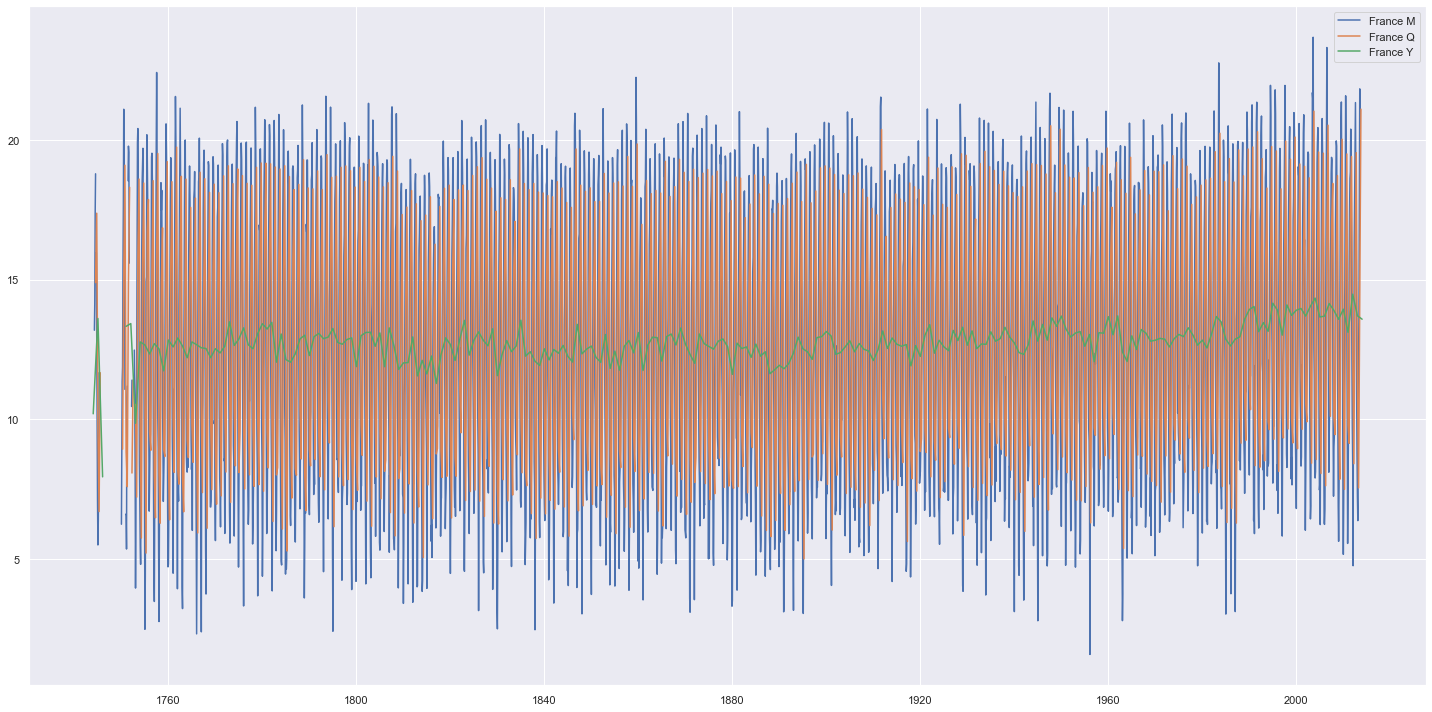

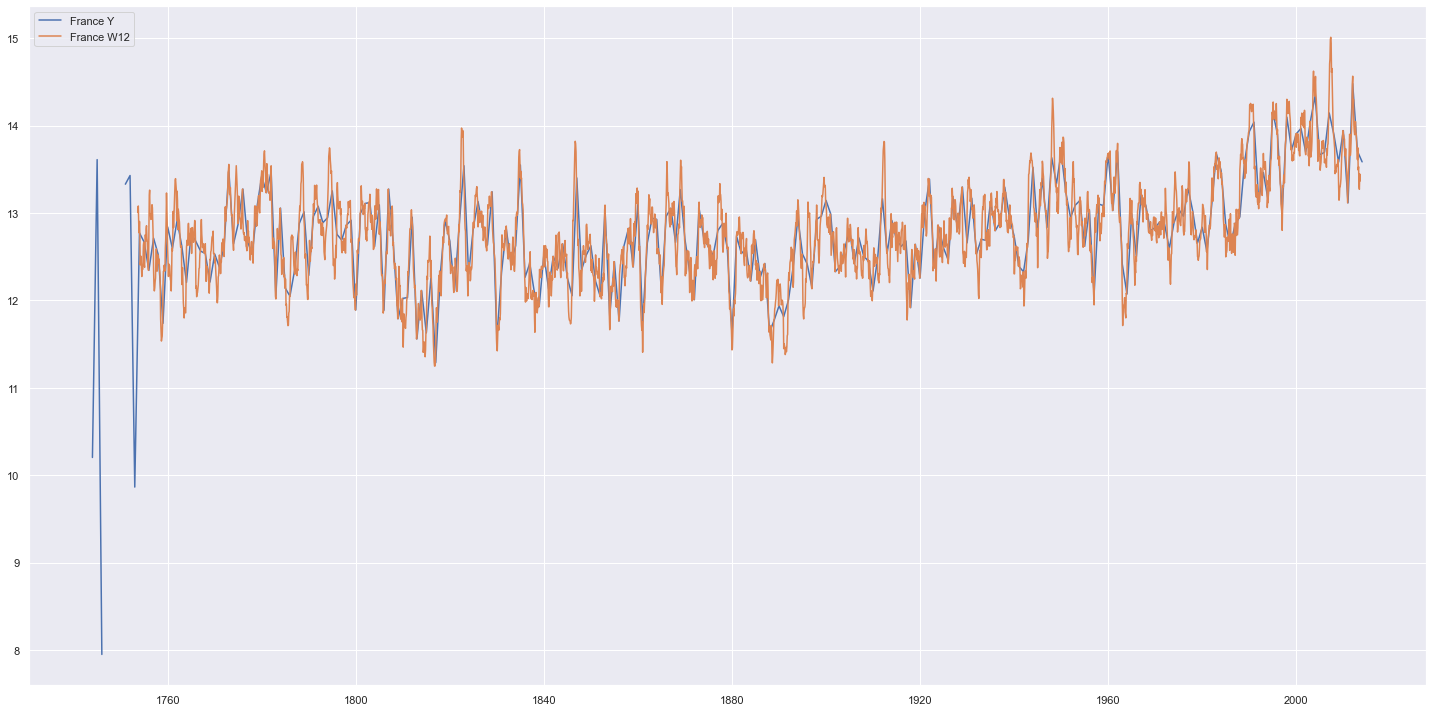

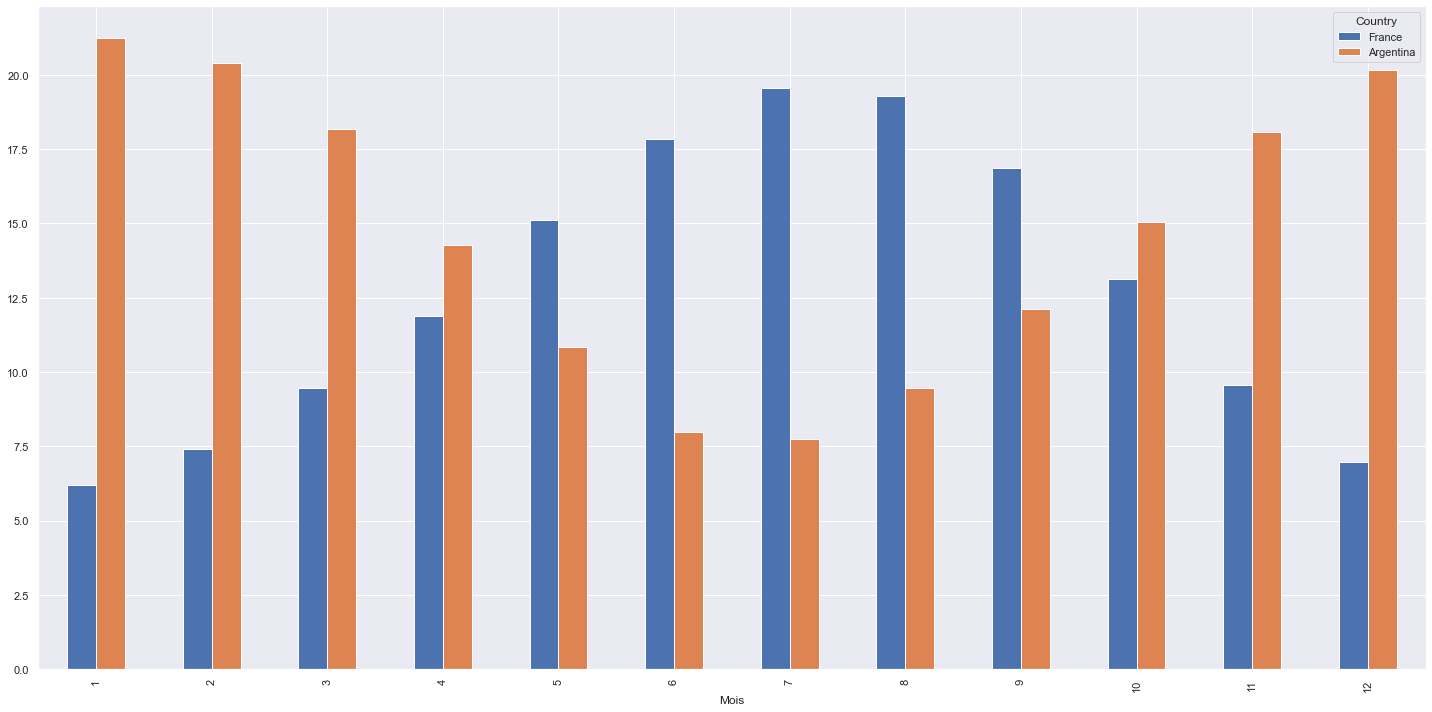

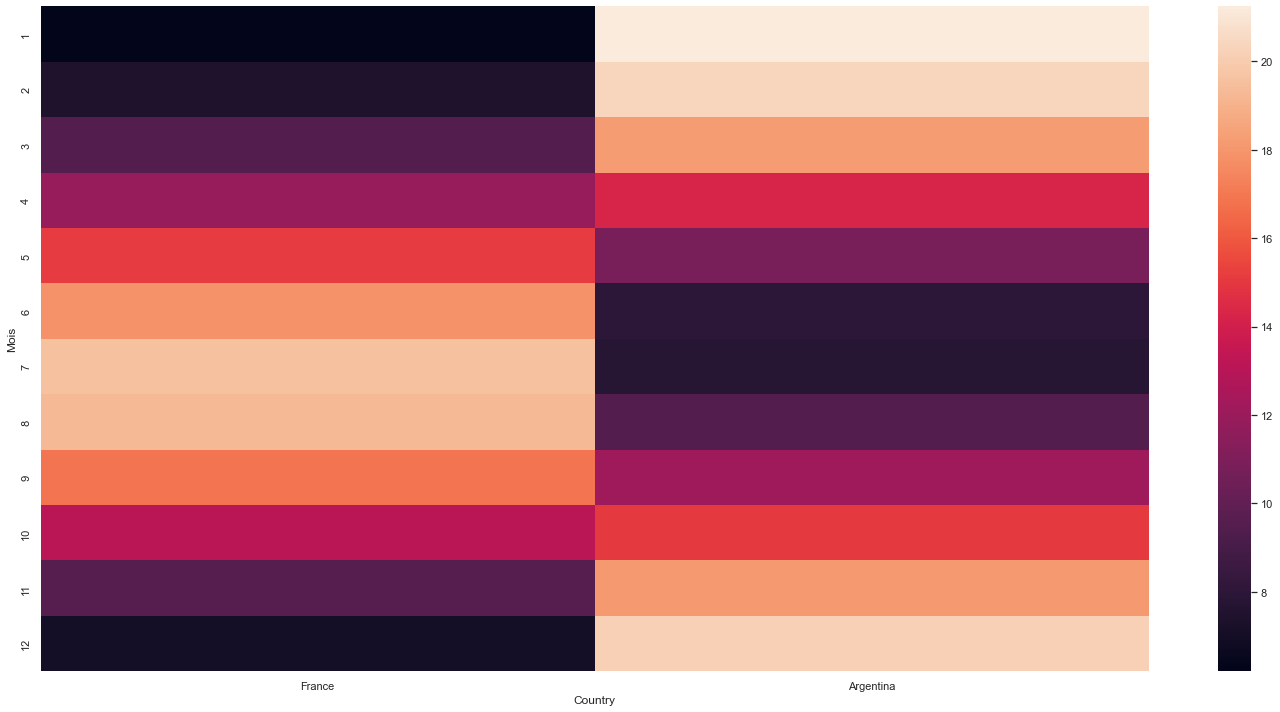

In [93]:
## Changer la granularité
df_y = df.resample('Y').mean()
df_q = df.resample('Q').mean()

## Plot France
plt.plot(df['France'], label = 'France M')
plt.plot(df_q['France'], label = 'France Q')
plt.plot(df_y['France'], label = 'France Y')
plt.legend()
plt.show()

## Moving average
df_w12 = df.rolling(window =12).mean()
plt.plot(df_y['France'], label = 'France Y')
plt.plot(df_w12['France'], label = 'France W12')
plt.legend()
plt.show()

## Créer index month 
df['Mois'] = df.index.month
df['Année'] = df.index.year

## Moyenne par mois
df_mean_M = df.groupby('Mois').mean()
## Faire un plot 
df_mean_M[['France', 'Argentina']].plot.bar()
plt.show()
ax = sns.heatmap(df_mean_M[['France', 'Argentina']])

## Stationarité
Dans le cas de série temporelle, il est possible que les données dépendent du temps, c'est à dire que l'évolution n'est pas stable. Prenons notre exemple de températures moyennes, est ce que la température sur 10 ans évolue de la même façon au XVIIIeme siècle et et XXeme?



- (1) Faire la moyenne lissée de la température par an pour la France puis faire sur le même plot
    - 1850-1900 et 1950-2000
- (2) Faire la moyenne lissée de la température sur 10 ans pour la France puis faire sur le même plot
    - 1850-1900 et 1950-2000
    
    
Or dans le cas de Machine Learning et de prédiction, nous avons besoin de nous assurer que notre algorithme peut aussi bien prédire la température en 1850 qu'en 2030 mais aussi en 2100. On a donc besoin que nos données soient stationnaires, c'est à dire sans tendance mais aussi sans effet saisonnal comme par exemple les températures hivernales. Pour ce faire on peut utiliser le test statistique **adfuller** qui va tester la stationnarité de nos séries temporelles. Si la p-value est inférieur à 0.05 la série est considéré comme stationnaire autrement elle est non stationnaire et nous devons la rendre stationnaire.

- (3) Utiliser la fonction adfuller de statsmodel pour savoir si la température moyenne en France est stationnaire
    - Tips: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
    
    
- (4) Liser le nouveau data set qui comprend le nombre de passager en avion par mois (airline-passengers.csv)
- (5) Faire un plot de l'évolution en fonction des mois de l'année 
- (6) Refaire le test adfuller


Quand une série temporelle est non stationnaire il y a plusieurs façon de la transformer tout en gardant nos la variance de nos données. L'une des façon la plus simple est de faire la différence entre la valeur n et n+1. Cela permet non plus d'avoir une série temporelle en valeur absolue mais d'avoir l'évolution au cours du temps. Il est aussi possible de faire une transformation logarithmique, ou expodentielle dépendant des données

- (7) Faire la différence entre n et n+1 puis refaire le test adfuller
    - Tips: utiliser .diff()
    
- (8) Faire la différence entre n et n+20 puis refaire le test adfuller
    - Tips: utiliser .diff()

In [367]:
from statsmodels.tsa.stattools import adfuller
from numpy import log



<AxesSubplot:xlabel='dt'>

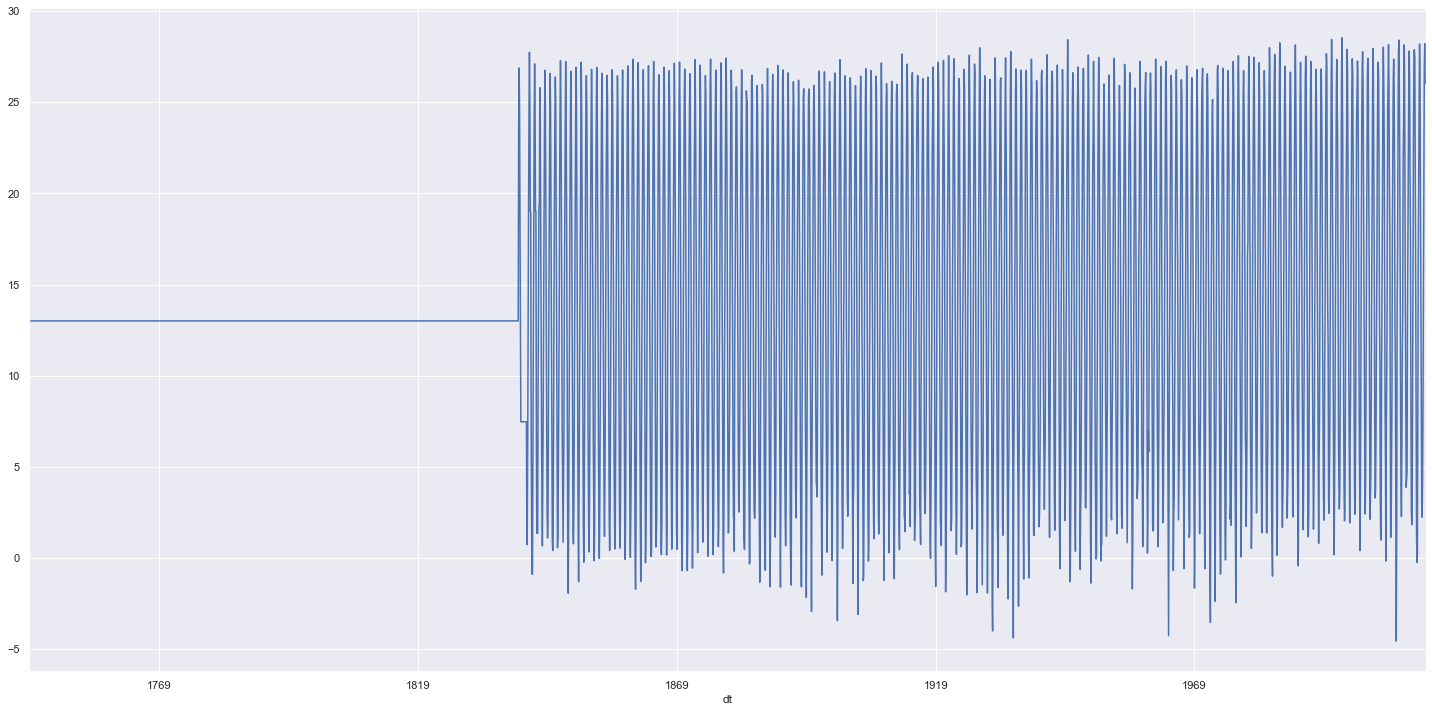

In [396]:
df.ffill()['Afghanistan'].bfill().plot()#isna().sum()

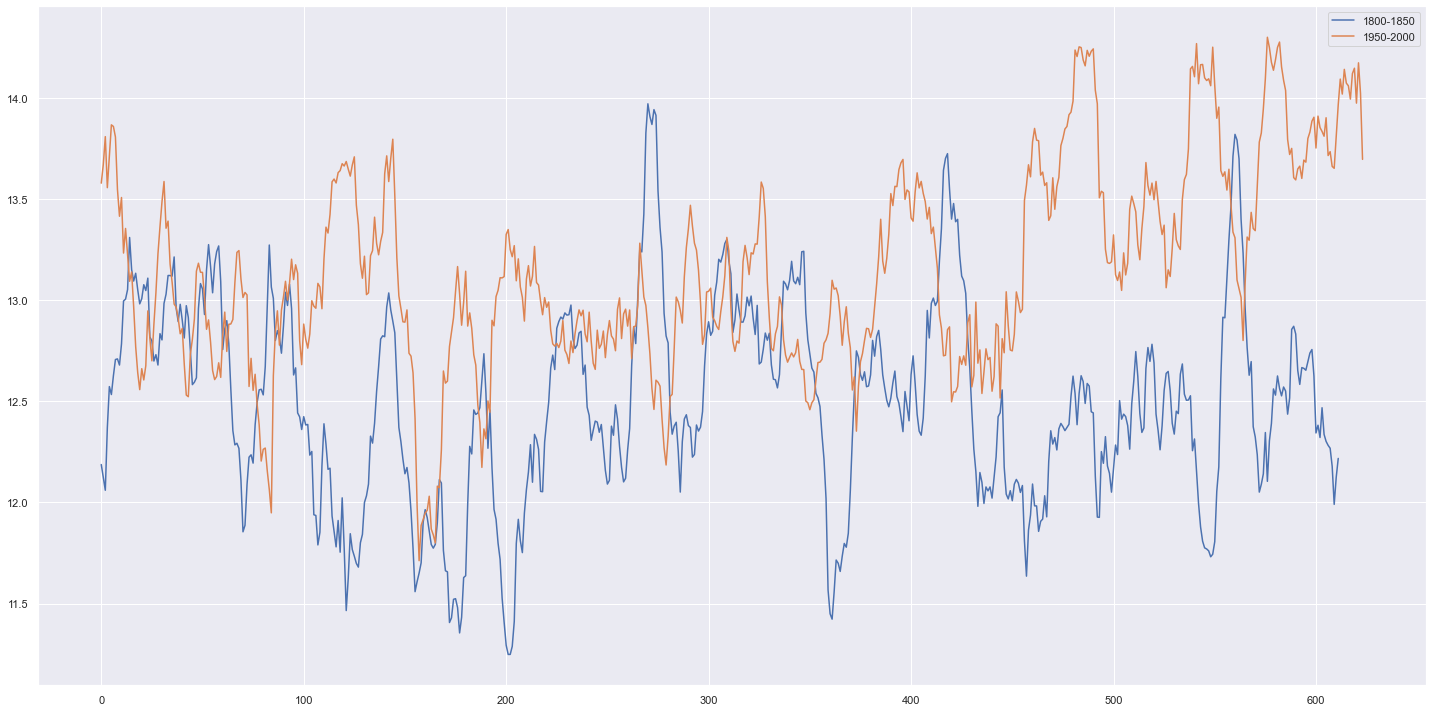

In [388]:

df_clean =  df.interpolate(method = 'linear').ffill().drop_duplicates()

## Température moyenne sur 1 an 1850-1900 et 1950-2000
df_fr_mean = df_clean.rolling(window =12).mean()['France']
df_fr_mean_1800_1850 = df_fr_mean[(df_fr_mean.index>'1799-12-31')&(df_fr_mean.index<"1850-12-31")]
df_fr_mean_1950_2000 = df_fr_mean[(df_fr_mean.index>'1949-12-31')&(df_fr_mean.index<"2001-12-31")]

plt.plot(df_fr_mean_1800_1850.reset_index()['France'], label = '1800-1850')
plt.plot(df_fr_mean_1950_2000.reset_index()['France'], label = '1950-2000')
plt.legend()
plt.show()

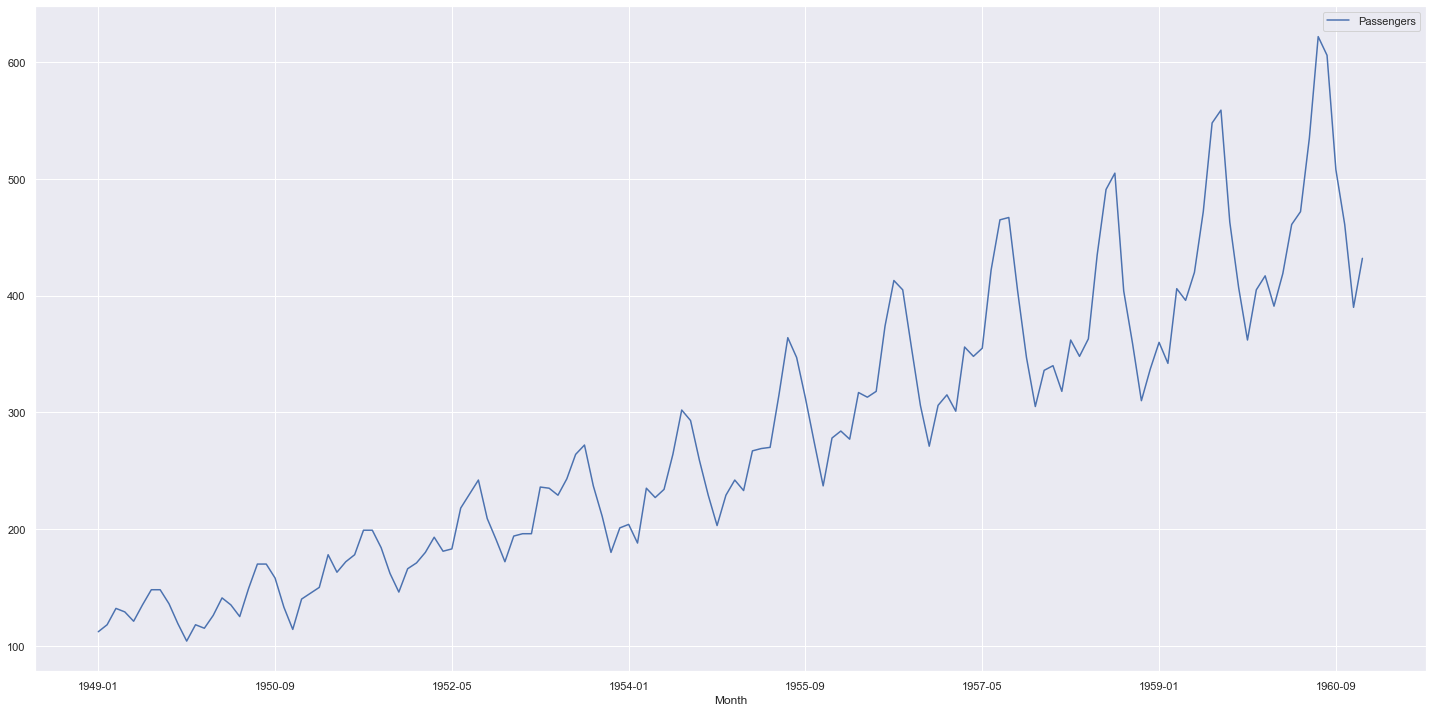

In [372]:
## Load et refaire le plot + fonction adfuller sur le nouveau data set    
airline_passenger = pd.read_csv( '/Users/mc/Downloads/airline-passengers.csv').set_index('Month')
airline_passenger.plot()
plt.show()

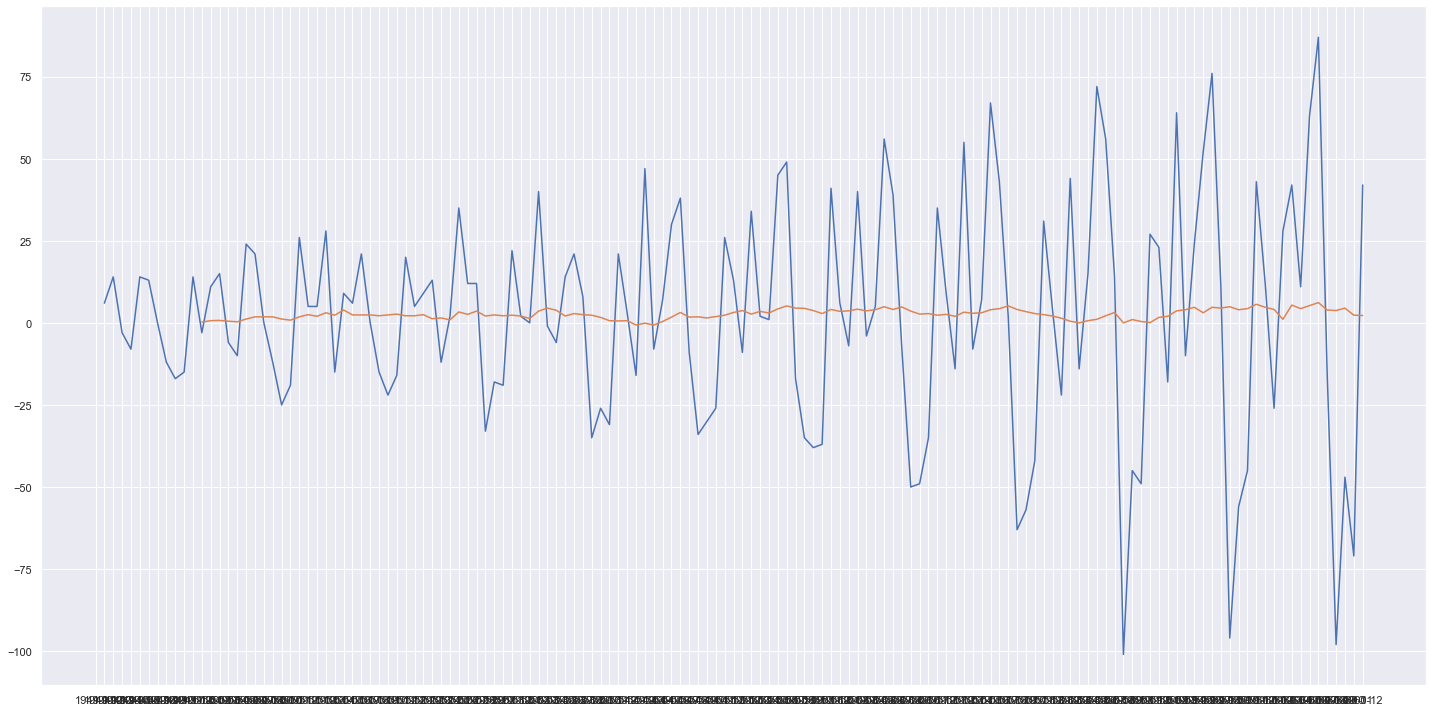

In [385]:
plt.plot(airline_passenger.diff())
plt.plot(airline_passenger.diff().rolling(window=12).mean())

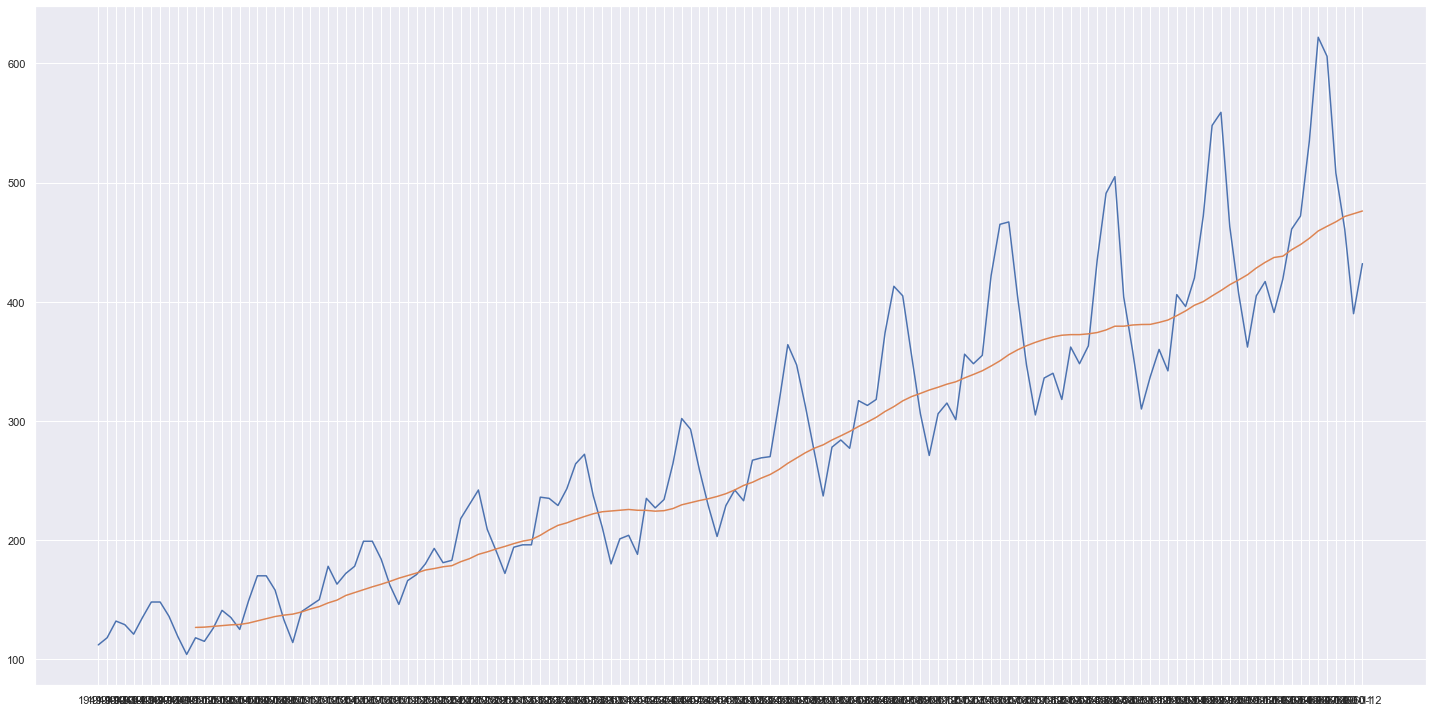

In [387]:
plt.plot(airline_passenger)
plt.plot(airline_passenger.rolling(window=12).mean())

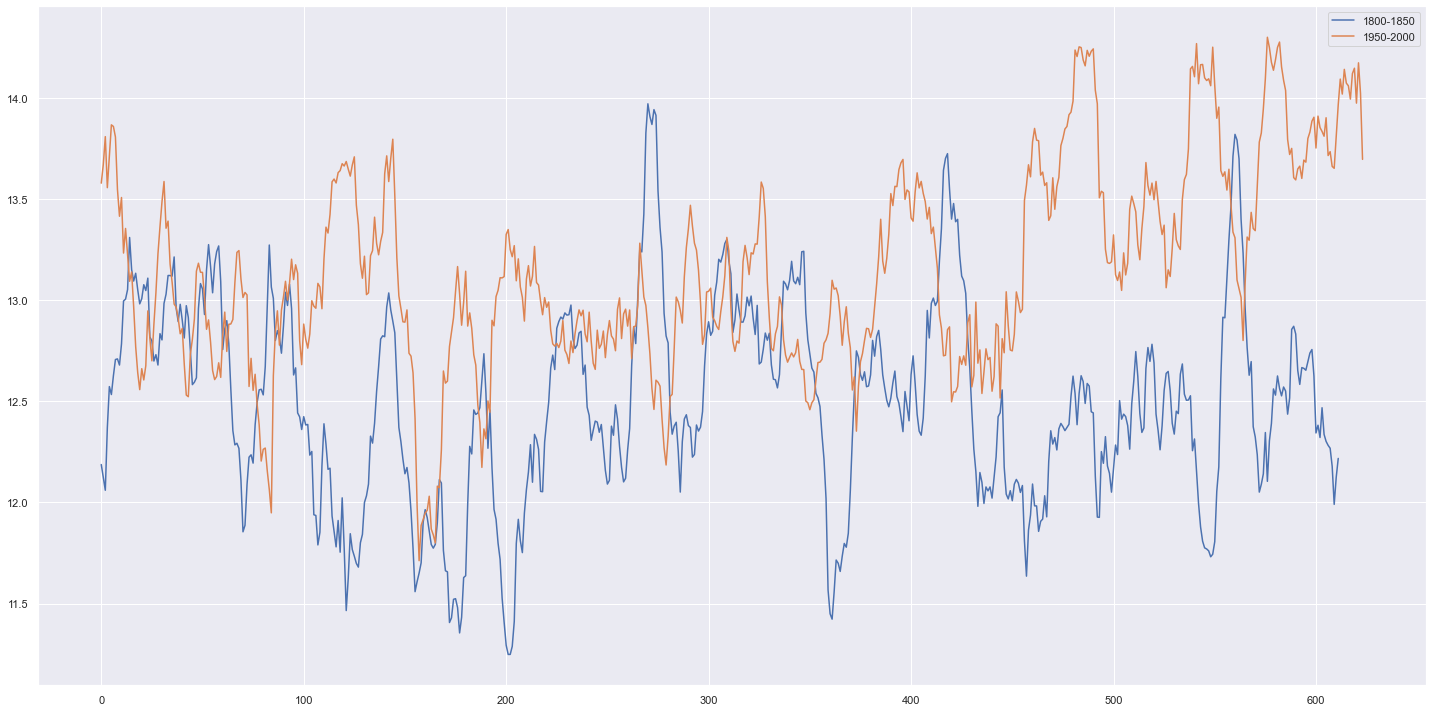

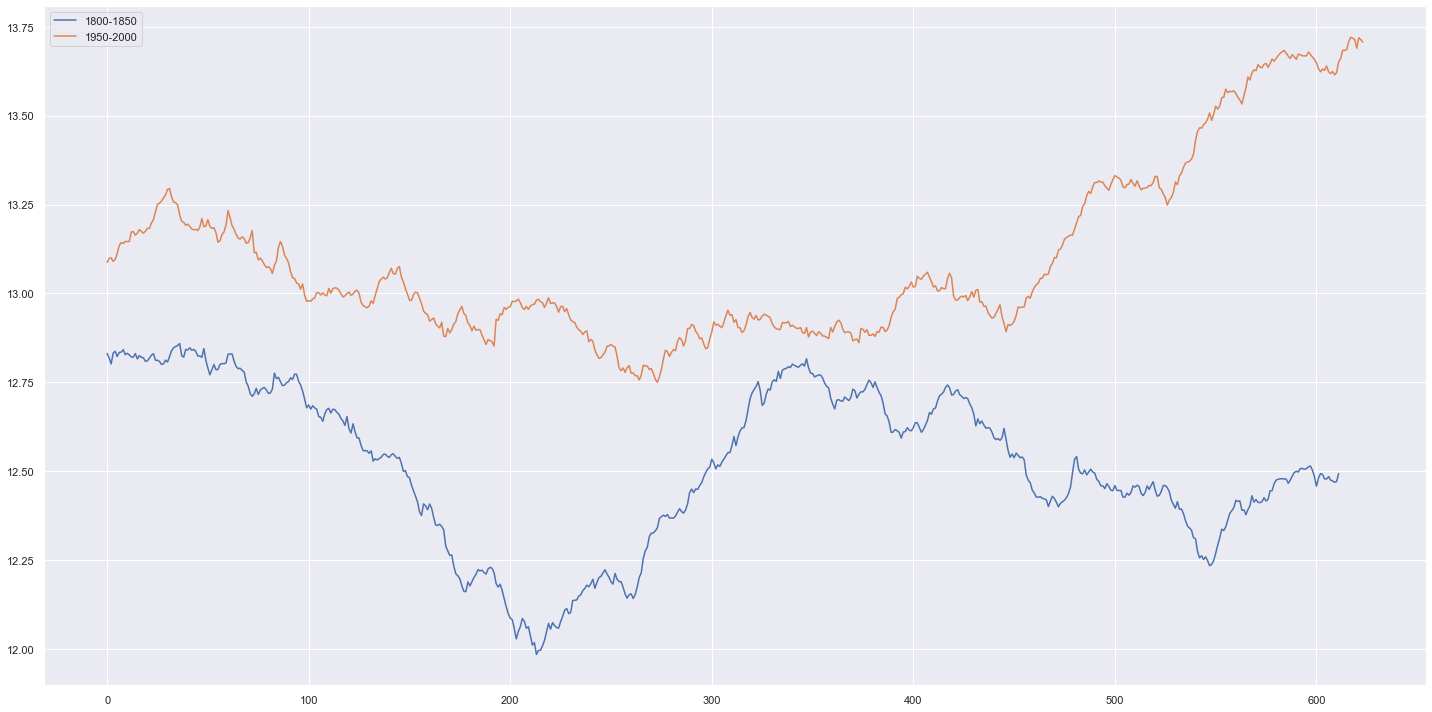

ADF Statistic: -6.088827
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


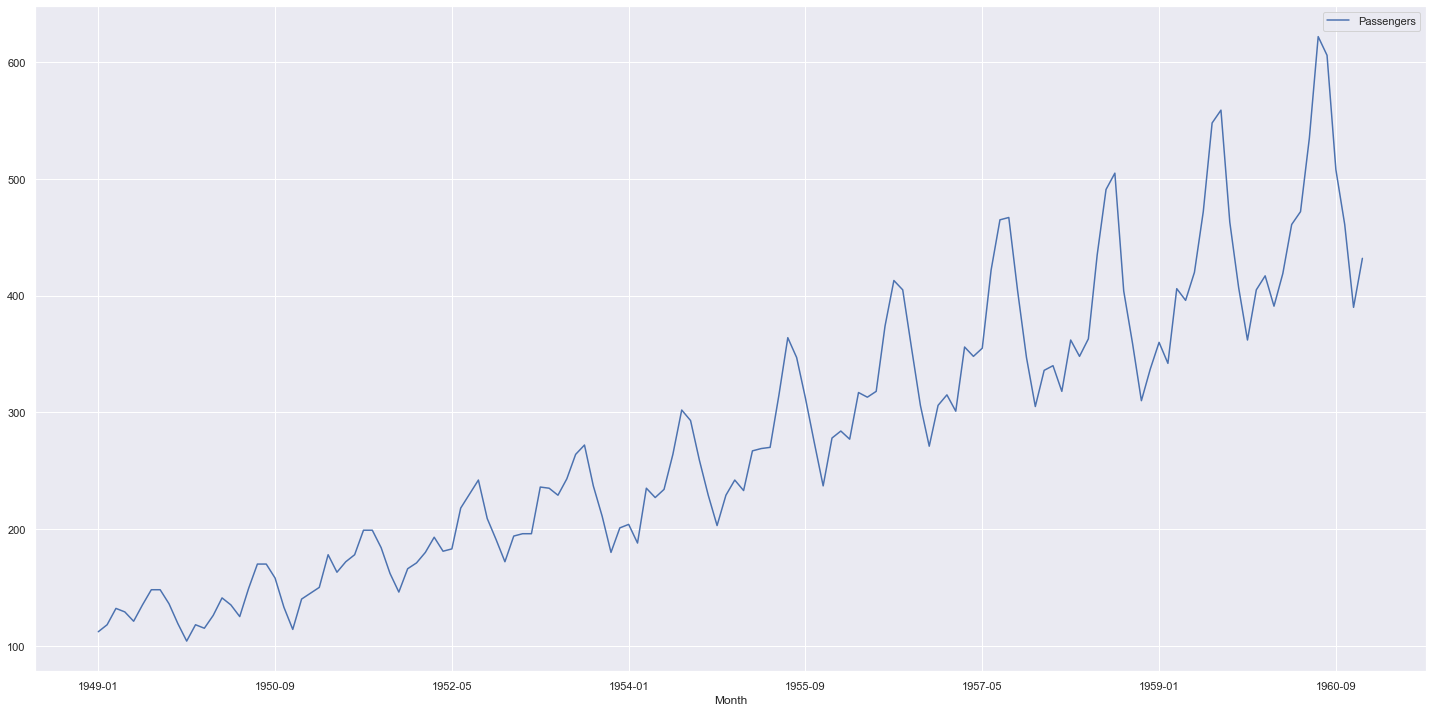

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


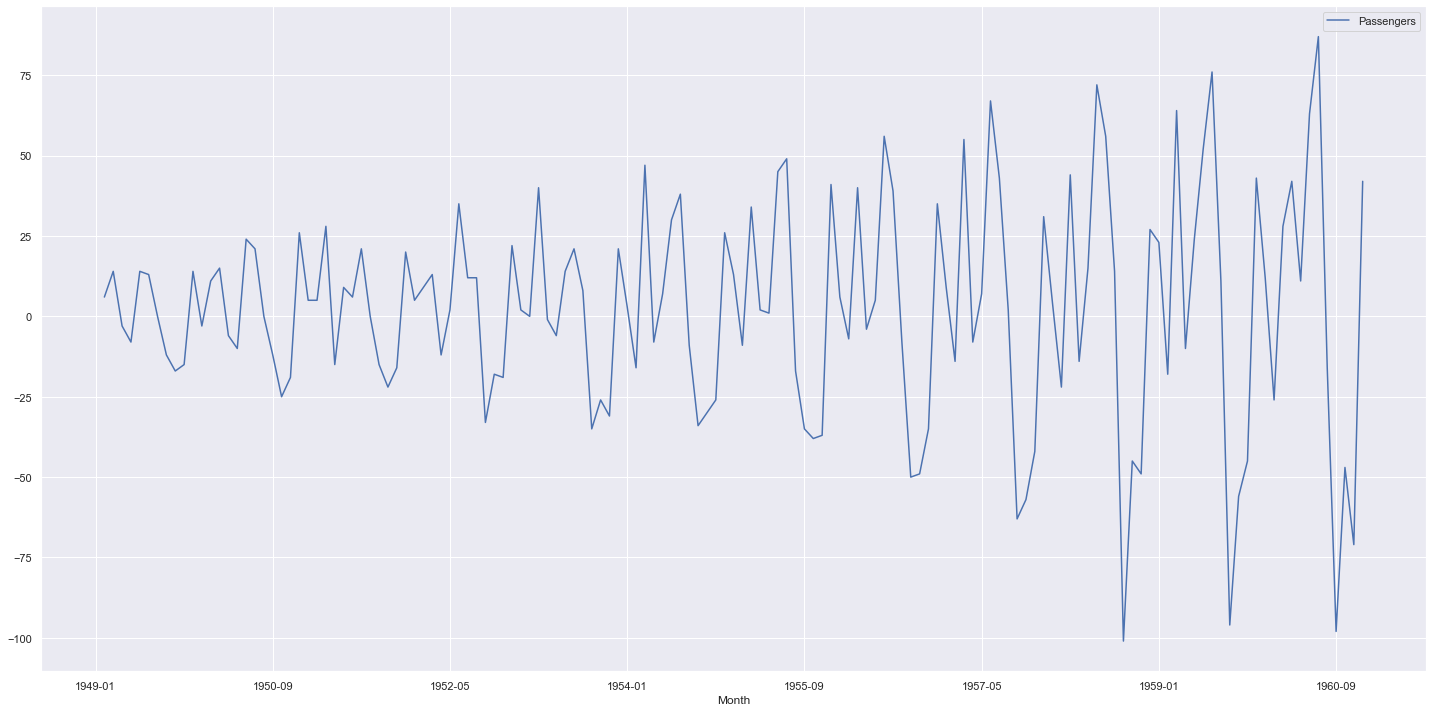

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


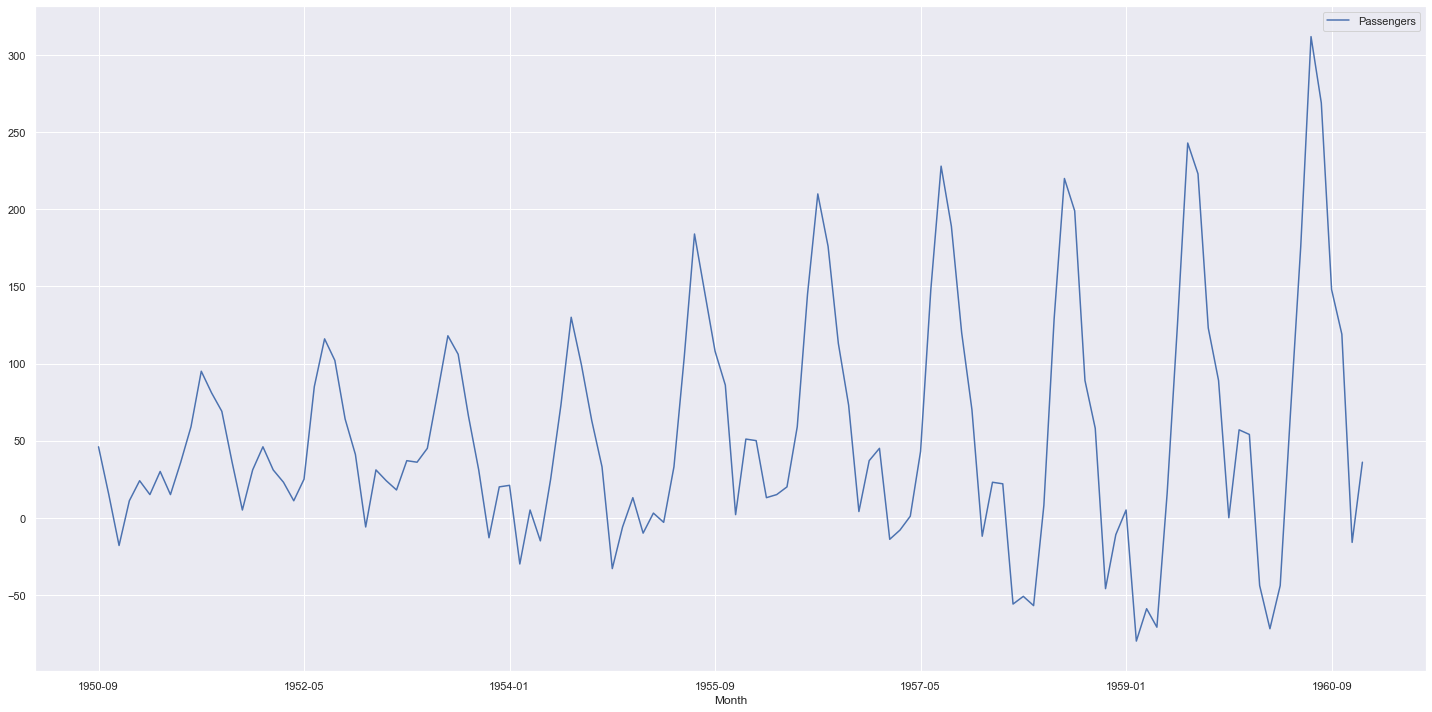

ADF Statistic: -2.908103
p-value: 0.044414
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

df_clean =  df.interpolate(method = 'linear').ffill().bfill().drop_duplicates()

## Température moyenne sur 1 an 1850-1900 et 1950-2000
df_fr_mean = df_clean.rolling(window =12).mean()['France']
df_fr_mean_1800_1850 = df_fr_mean[(df_fr_mean.index>'1799-12-31')&(df_fr_mean.index<"1850-12-31")]
df_fr_mean_1950_2000 = df_fr_mean[(df_fr_mean.index>'1949-12-31')&(df_fr_mean.index<"2001-12-31")]

plt.plot(df_fr_mean_1800_1850.reset_index()['France'], label = '1800-1850')
plt.plot(df_fr_mean_1950_2000.reset_index()['France'], label = '1950-2000')
plt.legend()
plt.show()

## Température moyenne sur 10 an 1850-1900 et 1950-2000
df_fr_mean = df_clean.rolling(window =12*10).mean()['France']
df_fr_mean_1800_1850 = df_fr_mean[(df_fr_mean.index>'1799-12-31')&(df_fr_mean.index<"1850-12-31")]
df_fr_mean_1950_2000 = df_fr_mean[(df_fr_mean.index>'1949-12-31')&(df_fr_mean.index<"2001-12-31")]

plt.plot(df_fr_mean_1800_1850.reset_index()['France'], label = '1800-1850')
plt.plot(df_fr_mean_1950_2000.reset_index()['France'], label = '1950-2000')
plt.legend()
plt.show()

## Utiliser la fonction Adfuller
result = adfuller(df_clean['France'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
## Load et refaire le plot + fonction adfuller sur le nouveau data set    
airline_passenger = pd.read_csv( '/Users/mc/Downloads/airline-passengers.csv').set_index('Month')
airline_passenger.plot()
plt.show()


result = adfuller(airline_passenger['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
    
## Faire la différence n et n+1
airline_passenger_diff = airline_passenger.diff()
airline_passenger_diff.plot()
plt.show()
result = adfuller(airline_passenger_diff['Passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

## Faire la différence n et n+20
airline_passenger_diff = airline_passenger.diff(20)
airline_passenger_diff.plot()
plt.show()
result = adfuller(airline_passenger_diff['Passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

<AxesSubplot:xlabel='dt'>

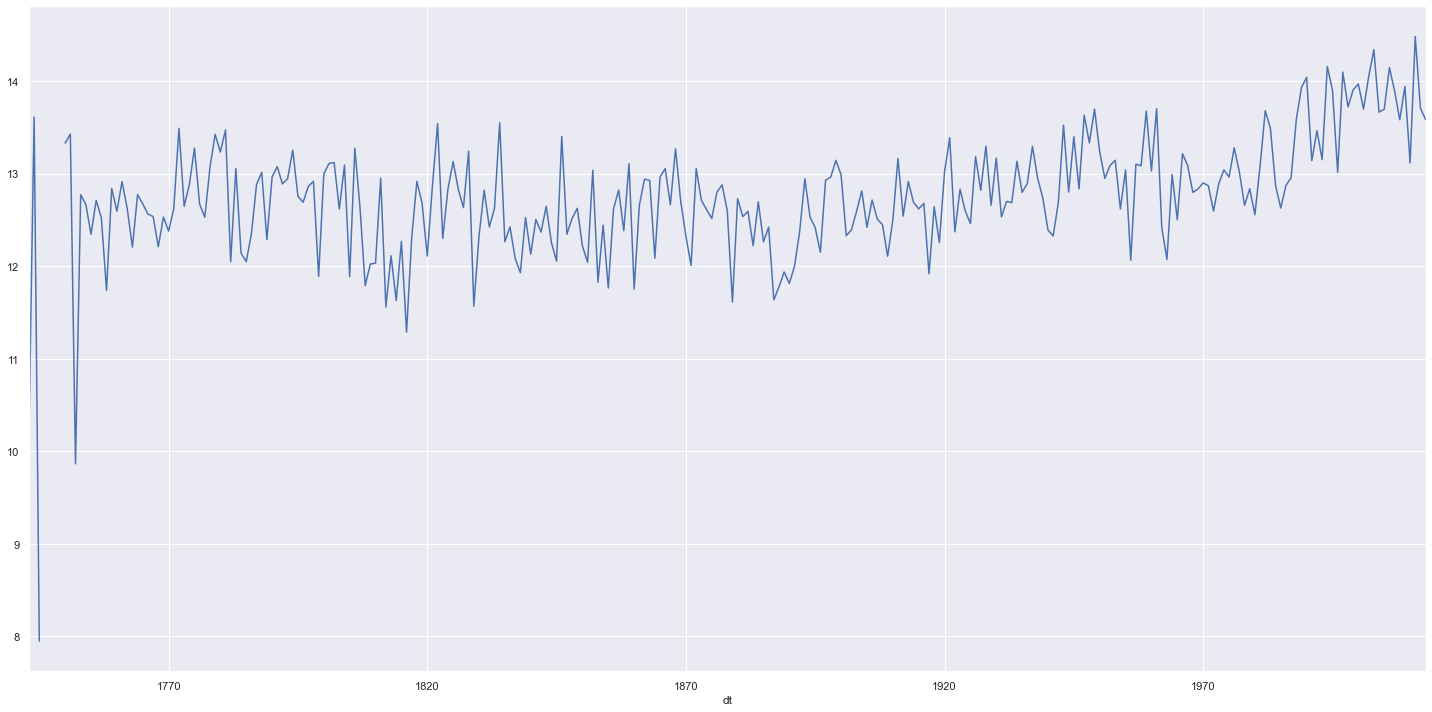

In [398]:
df['France'].resample('Y').mean().plot()

## Split le data set
### Introduction
Lorsqu'on fait du Machine learning il est indispensable d'entrainer nos algorithmes sur une partie de notre data set et de tester nos prédictions sur une autre partie dites naïve. On a donc un data set total séparer en **training set** et **test set**, en général on considère que le training set représente 70% du data set total. Cela dépend biensur de la taille du data set et peut être supérieur mais rarement inférieur. Il est également parfois possible d'avoir un **validation set** pour tester nos paramètres, nous en reparlerons plus tard.

### Comment faire le split
Il est indispensable de garder une certaine continuité de variance entre le training et test set. C'est à dire qu'on ne peut pas séparer le data set de nimporte quel façon. Prenons notre exemple concret, si l'on veut prédire la température dans les 30 prochaines années, si l'on coupe notre data set à 70% cela veut dire jusqu'en 1932 pour le training set. Certes cela est après la révolution industrielle mais avant la seconde guerre mondiale et l'accélération du réchauffement climatique. On aura donc un training et un test set qui seront très différent et donc **biaisé**.

## Boostraping 
Il est donc indispensable de "mélanger" le data set grâce au bootstraping, cette méthode permet de mélanger aléatoirement les données. L'aléatoire permet de s'assurer de ne pas avoir de biais conscient mais il peut toujours subsister des biais aléatoires, notamement dans de petits data set comme le notre. On peut donc faire plusieurs fold

- (1) Utiliser la fonction disponoble pour créer des bootstrap de notre time series et faire des plots 
- (2) Faire une fonction qui coupe notre bootstrap data set à 70% en train et test set

In [6]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [k for k in range(0,100)]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=20, random_state=1)
print('Bootstrap Sample: %s' % boot)
print("")
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [37, 12, 72, 9, 75, 5, 79, 64, 16, 1, 76, 71, 6, 25, 50, 20, 18, 84, 11, 28]

OOB Sample: [0, 2, 3, 4, 7, 8, 10, 13, 14, 15, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [412]:
def seasonal_bootstrap(df, freq, shift_max=0, n_samples=1, replace=False,
                       n_jobs=1):

    leap_mask = (~((df.index.month == 2) & (df.index.day == 29)))
    new_df = df.copy() #df without leap years
    new_df = new_df[leap_mask]       
    parallel = Parallel(n_jobs=n_jobs)
    
    def create_seasonal_bootstrap(i):
        """
        Returns
        -------
        df_res : pd.DataFrame
            seasonally bootstrapped data
        """
        random.seed(i)
                
        if replace == True:
            index = new_df.index
            blocks = create_blocks(new_df, freq, shift_max)
            #convert list of blocks into array of blocks in order to use indexing
            b = np.empty(len(blocks), dtype=object)
            b[:] = blocks
            blocks = b
            lengths = [len(block) for block in blocks]
            ndays = np.bincount(lengths).argmax()
            blocks_to_shuffle = np.where(lengths == ndays)[0]
            new_indices = np.copy(blocks_to_shuffle)
            new_indices = np.random.choice(new_indices, len(new_indices),
                                           replace=True)
            blocks[blocks_to_shuffle]=blocks[new_indices]
                
        else:
            index = df.index
            blocks = create_blocks(df, freq, shift_max)
            random.shuffle(blocks)
        
        #out-of-bag indices
        
                
        df_res =  pd.concat(blocks)

        if isinstance(df_res, pd.DataFrame):
            df_res.set_index(index, inplace=True)
            
        else:
            df_res.index = index
            
        return df_res
    
    
    return parallel(
            delayed(create_seasonal_bootstrap)(i) for i in range(n_samples)
            )

def create_blocks(df, freq, shift_max=0):
  
    shift = random.randint(-shift_max, shift_max)
    df = df.shift(shift)
    #we retrieve groups through the groupby method            
    blocks = deque([gp[1] for gp in df.groupby(pd.Grouper(freq=freq))])
        
    return blocks



df_clean =  df.interpolate(method = 'linear').ffill().bfill().drop_duplicates()


bootstrap_samples = seasonal_bootstrap(df=df_clean,
                                       freq='Y',
                                       shift_max=0,
                                       n_samples=6,
                                       replace=True,
                                       n_jobs=1)

df_bootstrap = bootstrap_samples[1]

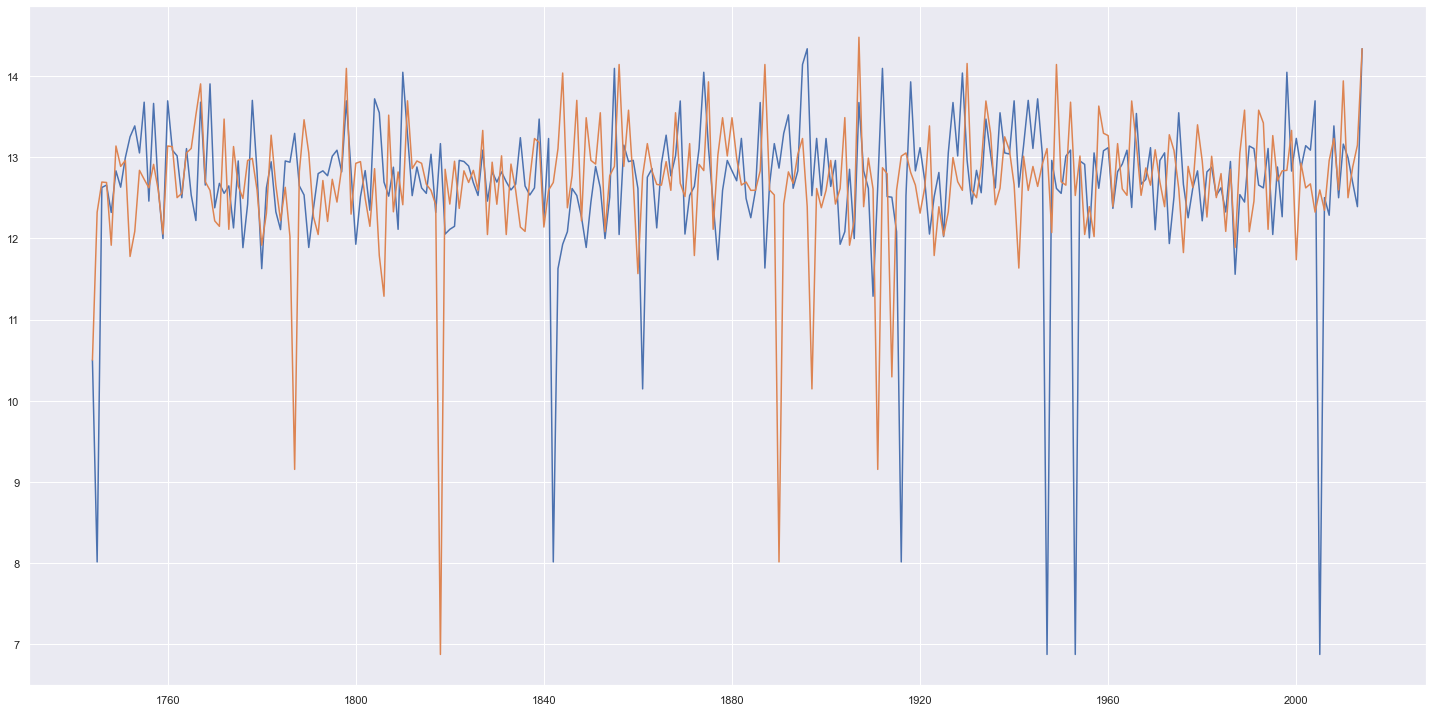

In [413]:
plt.plot(bootstrap_samples[1]['France'].resample('Y').mean())
plt.plot(bootstrap_samples[2]['France'].resample('Y').mean())

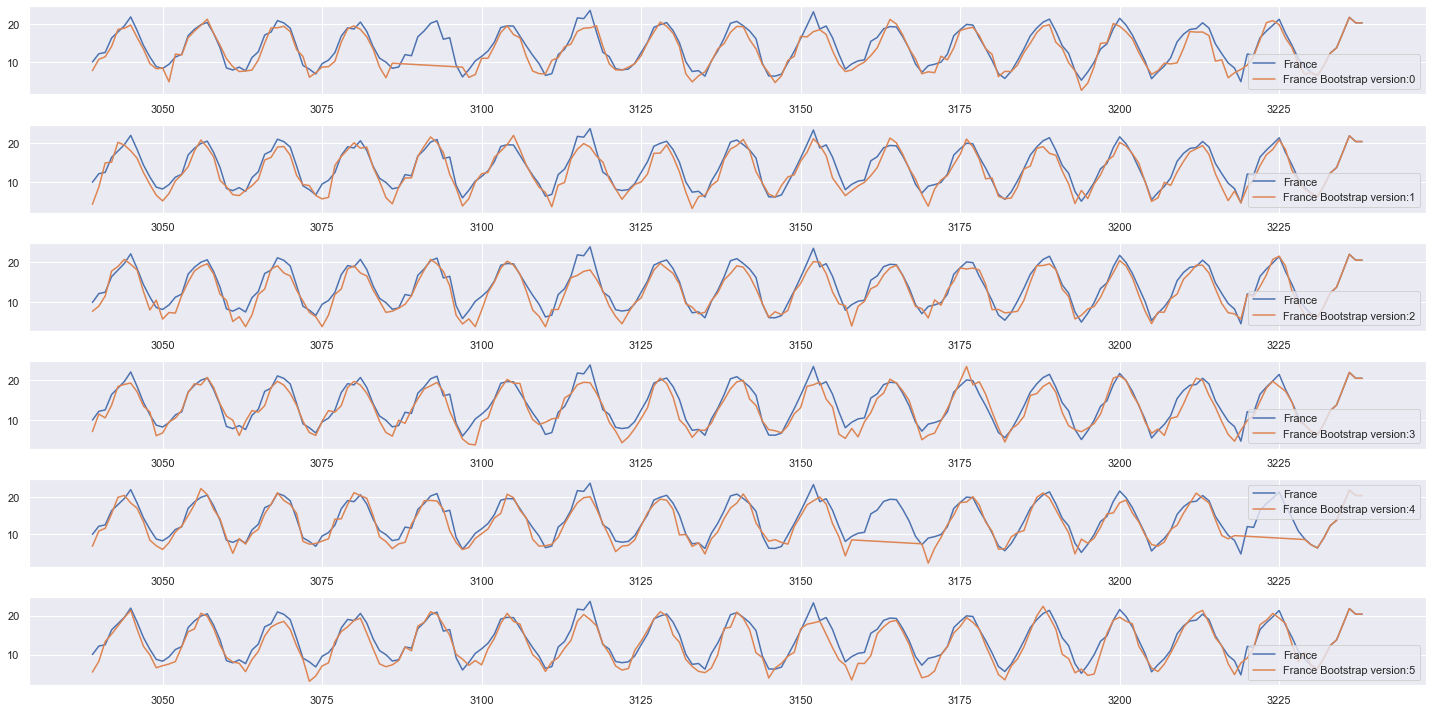

In [403]:
size = 200
for bootstrap in range(0,len(bootstrap_samples)):
    plt.subplot(len(bootstrap_samples),1,(bootstrap+1))
    plt.plot(df_clean.reset_index().iloc[-size:]['France'], label = 'France')
    plt.plot(bootstrap_samples[bootstrap].reset_index().iloc[-size:]['France'], 
             label = 'France Bootstrap version:'+str(bootstrap))
    plt.legend()




## Split consigne
### Couper le data set en deux en fonction de sa taille
#### Un train_set avec les 70% premières valeurs
#### Un test_set avec les 30% restantes

In [425]:
split_size = round(len(df)*0.7)
train = df[:split_size]
test = df[split_size:]

In [441]:
def split_data(df, split_fraction):
    split_size = round(len(df)*split_fraction)
    train = df[:split_size]
    test = df[split_size:]
    return train, test

In [442]:
train, test = split_data(df, 0.8)
print(len(train))
print(len(test))

2591
648


In [9]:
bootstrap_nb = 2
train_split = bootstrap_samples[bootstrap_nb].iloc[:round(len(bootstrap_samples[bootstrap_nb])*0.7)]
test_split = bootstrap_samples[bootstrap_nb].iloc[round(len(bootstrap_samples[bootstrap_nb])*0.7):]
print('train_split.shape',train_split.shape)
print('test_split.shape',test_split.shape)

train_split.shape (2267, 8)
test_split.shape (972, 8)


In [445]:
df['France']

dt
1743-11-01    10.203
1743-12-01       NaN
1744-01-01       NaN
1744-02-01       NaN
1744-03-01       NaN
               ...  
2013-05-01    13.763
2013-06-01    17.750
2013-07-01    21.817
2013-08-01    20.366
2013-09-01       NaN
Name: France, Length: 3239, dtype: float64

- Subplot ==> valeur de la France (normal)
- Subplot ==> valeur rescale (y=(x-mean)/std)
- ==> label + titre

In [460]:
pd.DataFrame(scaled)[0]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3234    0.792547
3235    1.391458
3236    1.535222
3237    1.299518
3238         NaN
Name: 0, Length: 3239, dtype: float64

In [463]:
pd.DataFrame(scaled)[0]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3234    0.792547
3235    1.391458
3236    1.535222
3237    1.299518
3238         NaN
Name: 0, Length: 3239, dtype: float64

In [470]:
df_fr = df.France
df_fr

dt
1743-11-01    10.203
1743-12-01       NaN
1744-01-01       NaN
1744-02-01       NaN
1744-03-01       NaN
               ...  
2013-05-01    13.763
2013-06-01    17.750
2013-07-01    21.817
2013-08-01    20.366
2013-09-01       NaN
Name: France, Length: 3239, dtype: float64

In [472]:
df_rescale 

dt
1743-11-01   -0.529002
1743-12-01         NaN
1744-01-01         NaN
1744-02-01         NaN
1744-03-01         NaN
                ...   
2013-05-01    0.203937
2013-06-01    1.024788
2013-07-01    1.862109
2013-08-01    1.563374
2013-09-01         NaN
Name: France, Length: 3239, dtype: float64

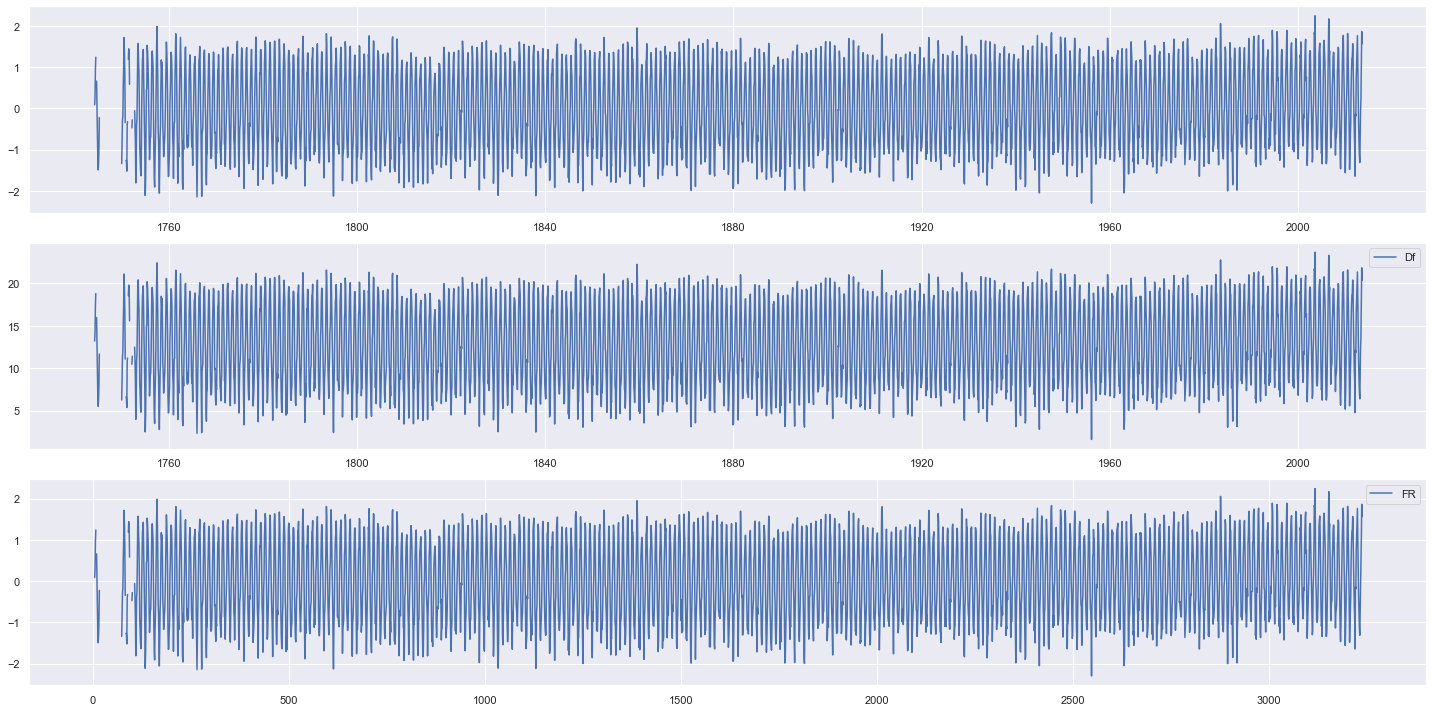

In [473]:
df_rescale = (df_fr - df_fr.mean())/df_fr.std()

plt.subplot(311)
plt.plot(df_rescale, label = 'Df rescale')
plt.subplot(312)
plt.plot(df['France'], label = 'Df')
plt.legend()
plt.subplot(313)
plt.plot(pd.DataFrame(scaled)[0],label="FR")
plt.legend()

## Scaling
Les machines en général n'aiment pas les gros nombres et ont plus de facilités pour gérer de très petites valeurs. Il est donc indispensable de transormer nos données en décimal. Cependant il faut garder la variance entre les valeurs et ne pas transformer nos données de nimporte quel façon. De même quand on utilise plusieurs types de data différentes par exemples ici la température moyennes mais on pourrait ajouter le CO2 produit, on peut avoir des ordre de grandeurs très différents. La température moyenne oscillera entre -50 et 50 alors que la production de CO2 sera de l'odre de milions voir de miliard. Pour éviter que le réseau de neurones donne un poids trop élevé au CO2 par rapport à la température, il faut donc les normaliser pour qu'il se retrouve dans les mêmes ordres de grandeurs.

Il existe plusieurs fonctions dans sklearn pour normaliser nos données
- Standard ==> y = (x – mean) / standard_deviation


- (1) Coder votre propre fonction pour Standard
- (2) Faire un plot de votre fonction et de la data non normalisée pour la France
- (2) Appliquer la normalisation en utilisant les fonctions de sklearn
     - scaler_train = StandardScaler()
     - scaler_train = scaler_train.fit(data)
         - Tips Reshape en array (len(data), 1)
- (3) Faire un plot de la différence des résultats


Il est également important de scaler sur le training set only puis de faire la transformation sur le test set. En effet, l'objectif est d'avoir aussi peu d'information que possible sur le test set pour reproduire une prédiction naïve losque l'on testera ces nouvelles données. Si l'on fit sur le test set on créera un **data leakage** qui donnera à notre algorithme des informations sur le test set. 

- (4) Fit le scaler sur le training set et appliquer le sur le test set
    - Tips: scaler_train.fit et scaler_train.transform (
        - Tips Reshape en array (len(data), 1)
        
- (5) Utiliser une autre fonction de Sklearn pour normaliser les données
    - MinMaxScaler()
    

- Reshape en matrice à deux dimensions

In [529]:
np.ones((3,4,12))#.shape

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

In [532]:
tata = np.ones((3,4,12))
tata.reshape(tata.shape[1]*tata.shape[2], tata.shape[0]).shape

(48, 3)

- Reshape en matrice a 5 dimensions

In [507]:
np.ones((3,4,12,56)).shape

(3, 4, 12, 56)

In [546]:
tata = np.ones((3,4,12,56))
tata.reshape(tata.shape[0], tata.shape[1],tata.shape[2],tata.shape[3],1,1,1,1,1,1,1,1).shape

(3, 4, 12, 56, 1, 1, 1, 1, 1, 1, 1, 1)

In [508]:
total = np.ones((3,4,12,56)).shape[0]*np.ones((3,4,12,56)).shape[1]*np.ones((3,4,12,56)).shape[2]*np.ones((3,4,12,56)).shape[3]
total

1612.8

- Reshape en vector (1 dimension)

In [492]:
np.ones((3,4,3,4)).shape

(3, 4, 3, 4)

In [539]:
tata = np.ones((3,4,3,4))
(3*4*3*4)/6

24.0

In [647]:
train['France']

dt
1743-11-01    10.203
1743-12-01       NaN
1744-01-01       NaN
1744-02-01       NaN
1744-03-01       NaN
               ...  
1959-05-01    15.638
1959-06-01    18.297
1959-07-01    21.017
1959-08-01    19.684
1959-09-01    18.401
Name: France, Length: 2591, dtype: float64

In [645]:
pd.DataFrame(scaled).plot()

0
0            NaN
1            NaN
2       0.023178
3            NaN
4            NaN
...          ...
634790  0.030155
634791  0.029247
634792  0.024359
634793  0.023368
634794  1.000000

[634795 rows x 1 columns]

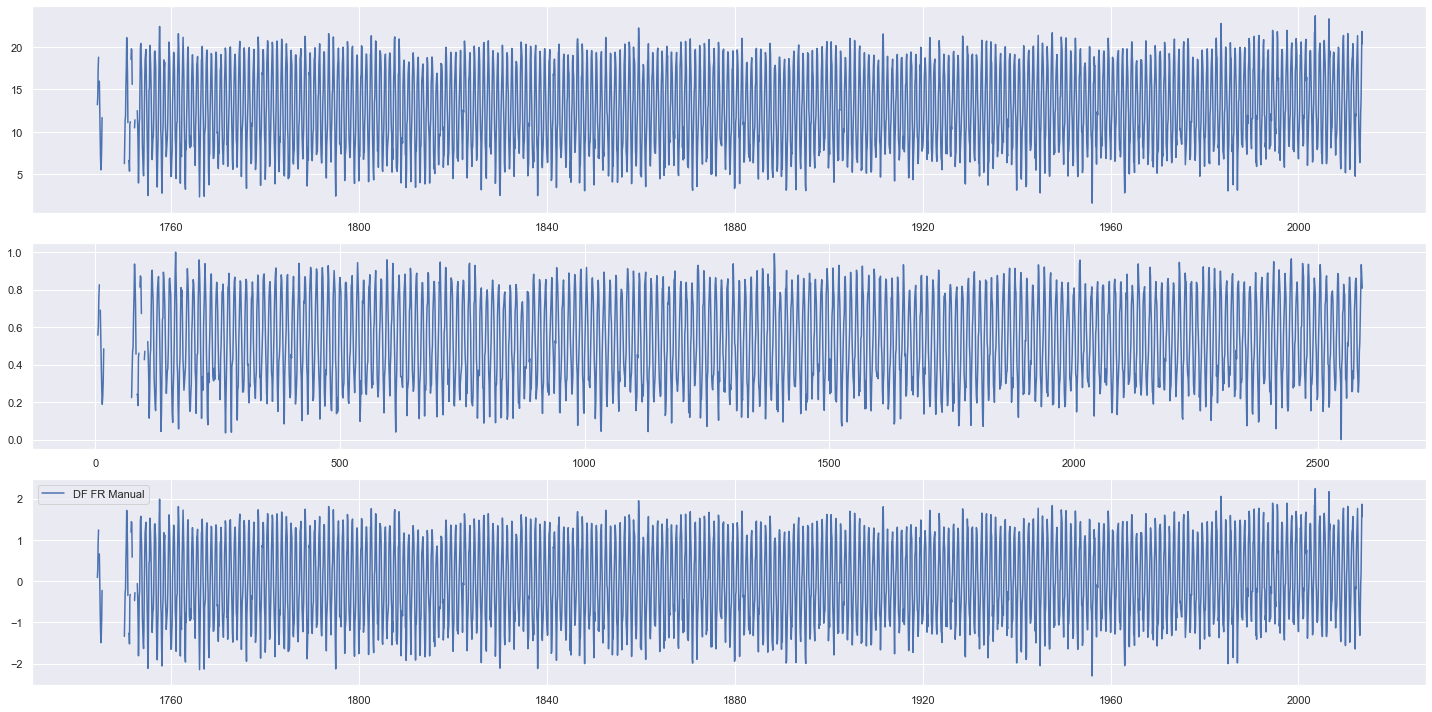

In [657]:
## Code propre fonction
def standard_normalisation(df):
    data_normalised = (df-df.mean())/df.std()
    return data_normalised

## Plot
rescaled_manual = standard_normalisation(df_fr)#['France']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = MinMaxScaler()
#scaled = scaler.fit_transform(np.array(df['France']).reshape(np.array(df['France']).shape[0],1))
scaled = scaler.fit_transform(np.array(train['France']).reshape(-1,1))



plt.subplot(311)
plt.plot(df_fr, label='DF FR')
plt.subplot(312)
plt.plot(scaled, label='DF Scaled Sklearn')
plt.subplot(313)
plt.plot(rescaled_manual, label = 'DF FR Manual')
plt.legend()

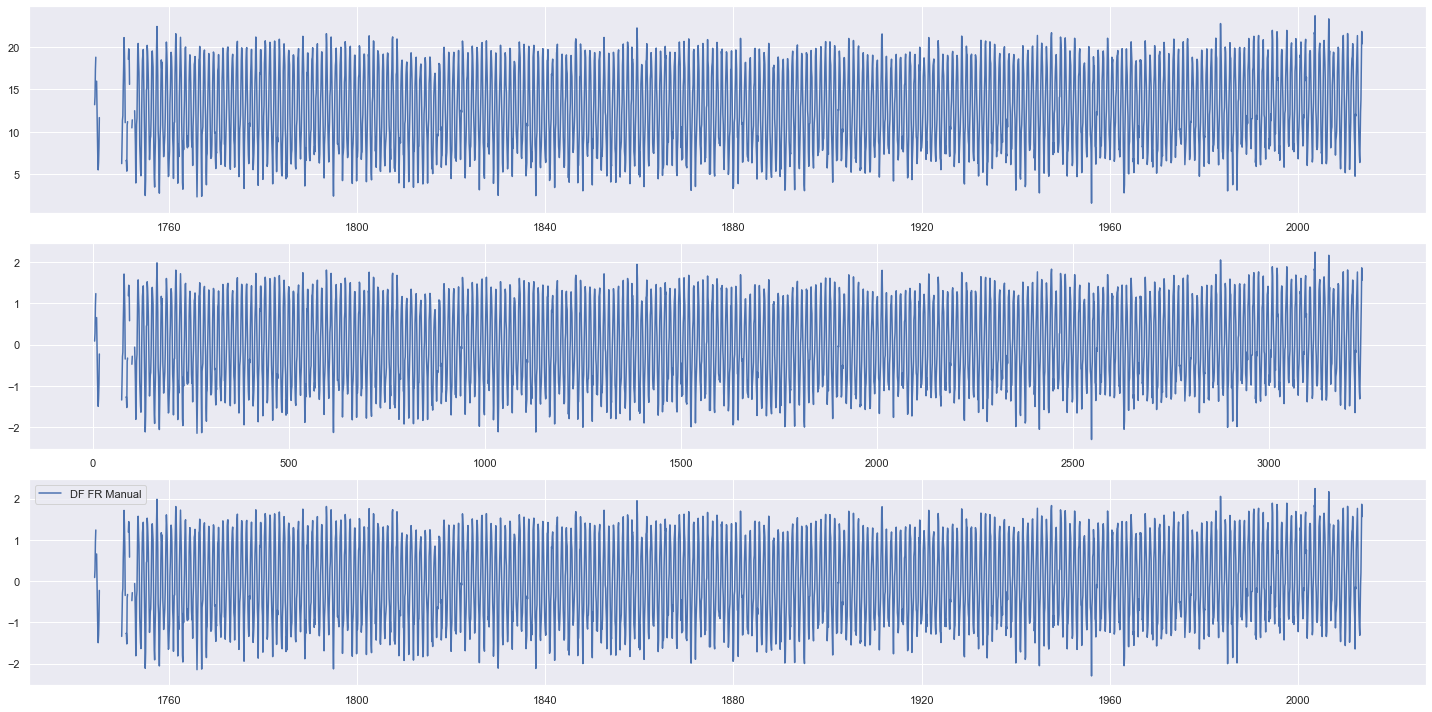

In [605]:
plt.subplot(311)
plt.plot(df_fr, label='DF FR')
plt.subplot(312)
plt.plot(scaled, label='DF Scaled Sklearn')
plt.subplot(313)
plt.plot(rescaled_manual, label = 'DF FR Manual')
plt.legend()

In [590]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(np.array(df['France']).reshape(np.array(df['France']).shape[0],1))
pd.DataFrame(scaled)[0]                      

0      -0.529086
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3234    0.203969
3235    1.024949
3236    1.862403
3237    1.563621
3238         NaN
Name: 0, Length: 3239, dtype: float64

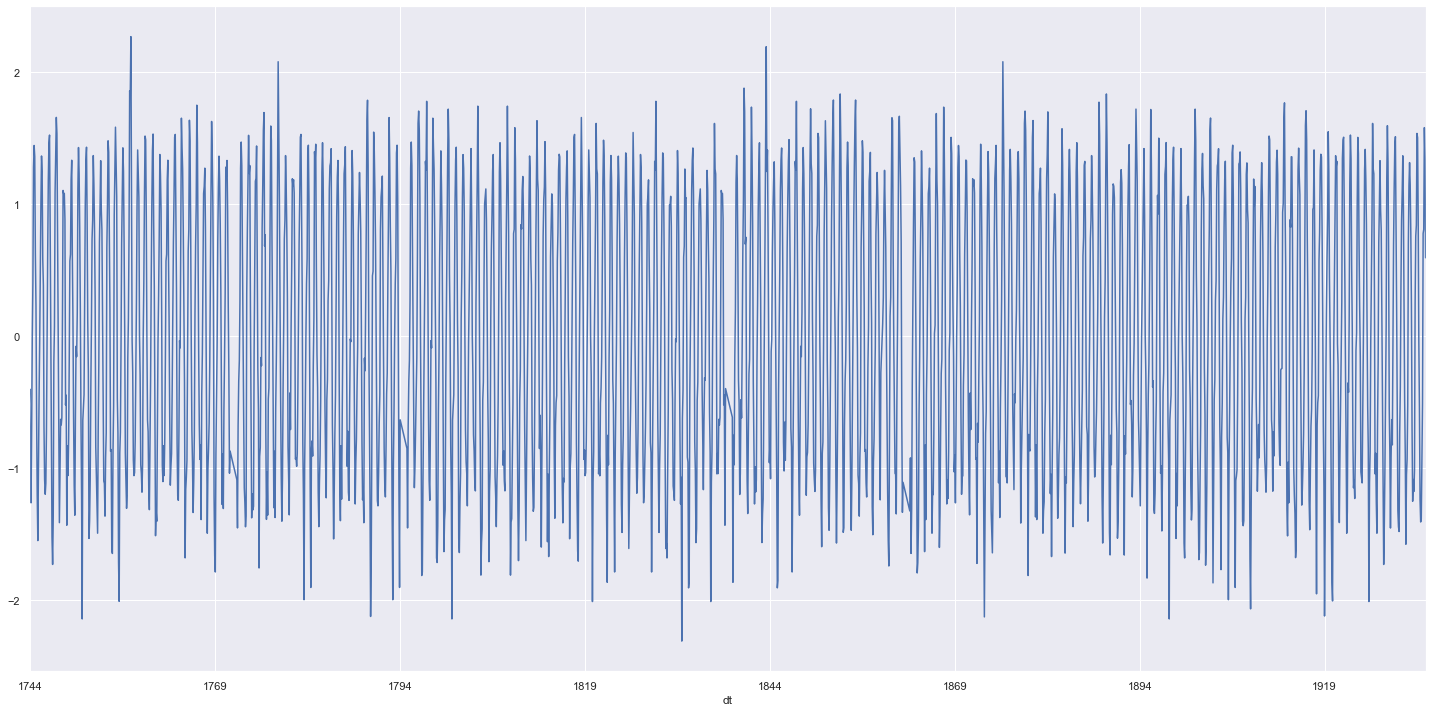

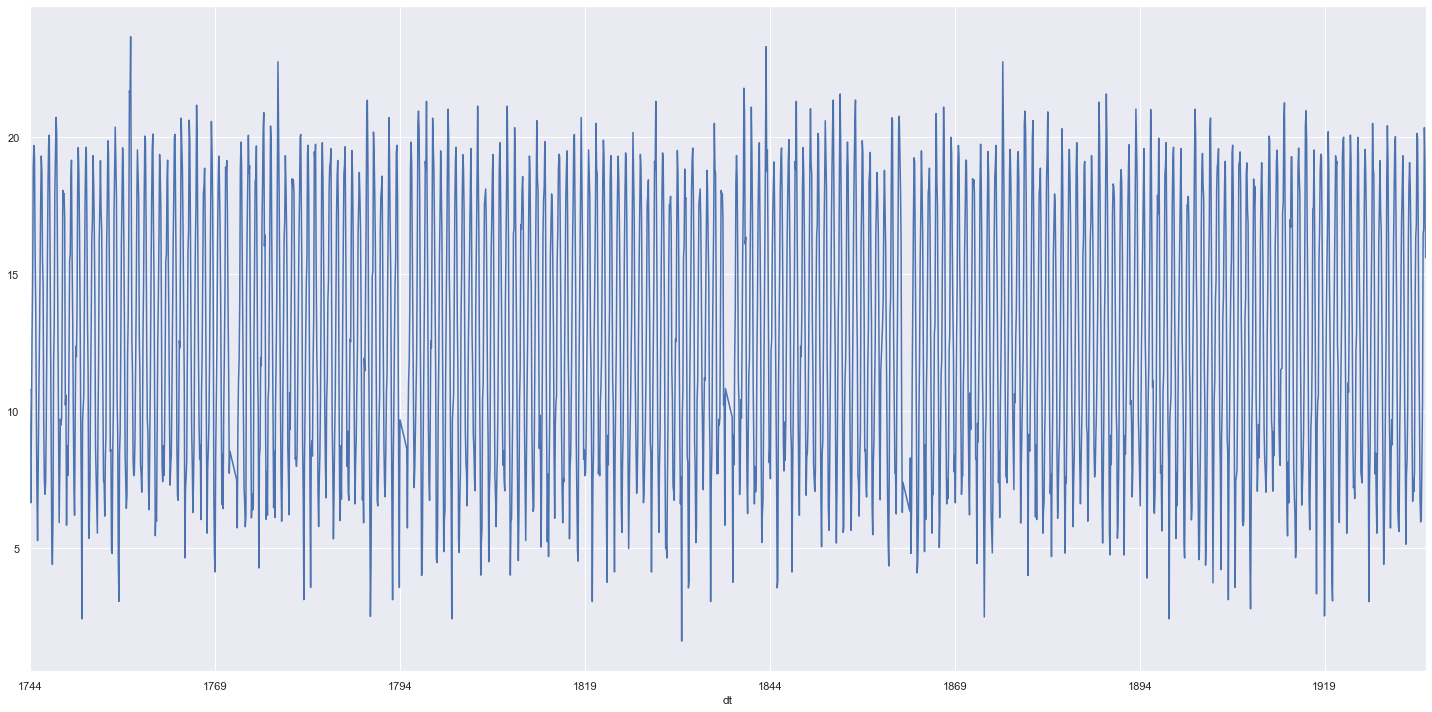

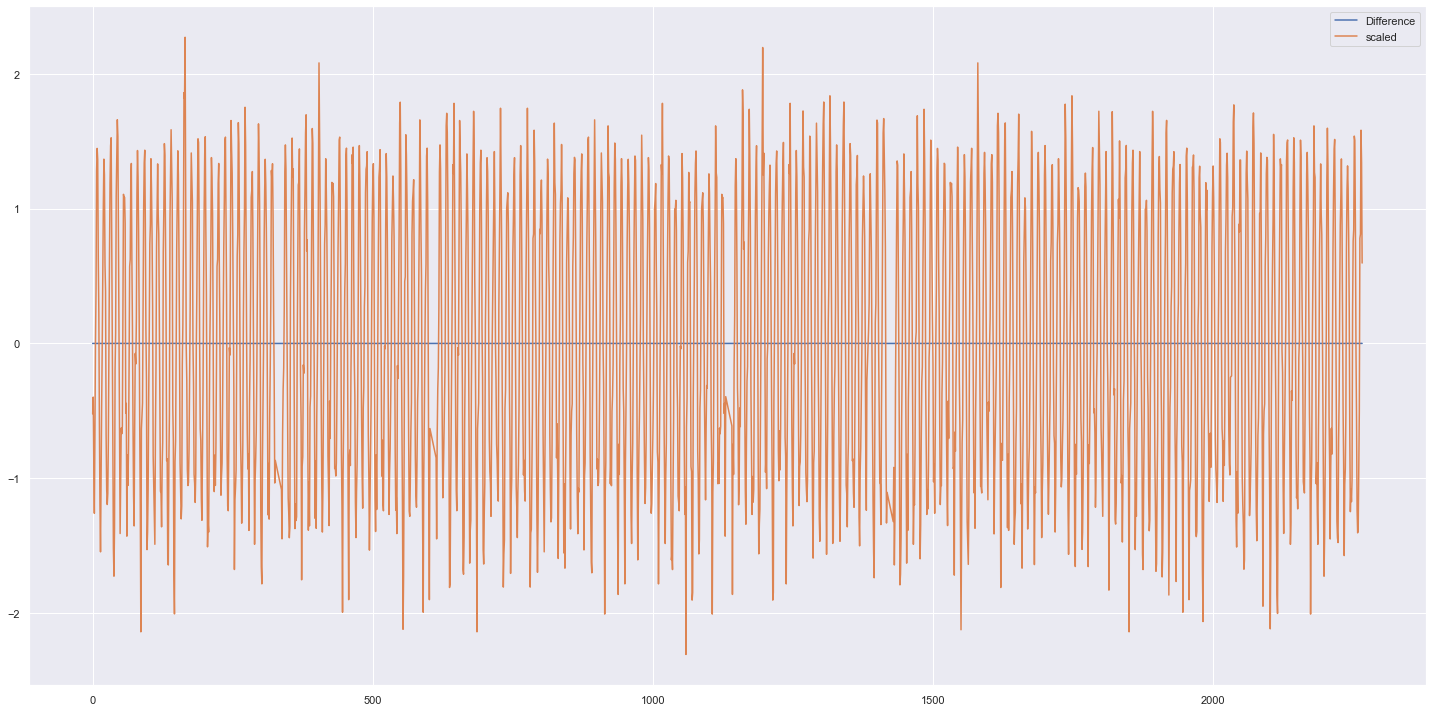

In [465]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Code propre fonction
def standard_normalisation(df):
    data_normalised = (df-df.mean())/df.std()
    return data_normalised

## Plot
standard_normalisation(train_split['France']).plot()
plt.show()
train_split['France'].plot()
plt.show()

## Appliquer la normalisation de sklearn (Standard)
scaler = StandardScaler()
scaled = scaler.fit_transform(np.array(train_split['France']).reshape(len(train_split['France']),1))

## Plot de la différence
difference = (pd.DataFrame(scaled) - pd.DataFrame(np.array(standard_normalisation(train_split['France']))))
plt.plot(pd.DataFrame(difference), label = 'Difference')
plt.plot(pd.DataFrame(scaled), label = 'scaled')
plt.legend()
plt.show()


## Fit Training || Rescale both train + test set
scaler_train = StandardScaler()
scaler_train = scaler_train.fit(np.array(train_split['France']).reshape(len(train_split['France']),1))
scaled_train = scaler_train.transform(np.array(train_split['France']).reshape(len(train_split['France']),1))
scaled_test = scaler_train.transform(np.array(test_split['France']).reshape(len(test_split['France']),1))

In [612]:
from pickle import dump
dump(scaler_train, open('scaler_fr.pkl', 'wb'))


## Préparation de données pour le MLP
Afin de nourrir le Multi layer perceptron il faut que les données du training set soit séparé en deux.
   - Une première partie comme entrainement, pour que l'algorithme utilise ces données afin de faire une prédiction 
   - Une seconde la valeur à prédire
   
Si on a donc une série de 5 valeurs [0, 1, 2 ,3 ,4], on veut utiliser les 4 premières pour prédire la 5eme. De même sur une série plus longue [0, 1, 2 ,3 ,4, 5, 6, 7, 8, 9] on aura donc une première fenêtre:
   - [0, 1, 2, 3] ==> prédire 4
   - [1, 2, 3, 4] ==> prédire 5
   - ...
   - [4, 5, 6, 7] ==> prédire 8
   
Par convention on nomme **X** les données que l'on utilise et **Y** les données que l'on veut prédire


- (1) Créer une fonction qui utilise la séquence suivante [0, 1, 2 ,3 ,4, 5, 6, 7, 8, 9], qui prends 4 valeurs pour en prédire une seule. La fonction doit retourner:
 - **X** = array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])
       
 - **Y** = array([4, 5, 6, 7, 8, 9])
 
 
 
 - (2) Utiliser votre fonction pour les températures moyenne en France sur le train et test set

- data_set
- ==> séparer en deux data_set = train_set + test_test
- ==> Scaled train ==> train_scaled
- ==> train_set_scaled ==> séparer en deux X_train et Y_train
- ==> X_train ==> ce qu'on utilise pour apprendre
- ==> Y_train ==> ce qu'on doit prédire

In [622]:
data_set =  [k for k in range(0,10)]
data_set

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [637]:
n_input = 4
X_train = []
Y_train = []
for i in range(len(data_set)-n_input):
    X_train.append(data_set[i:i+n_input])
    Y_train.append(data_set[i+n_input])

Y_train

[4, 5, 6, 7, 8, 9]

In [654]:
def split_X_Y(data_set, n_input):
    X_train = []
    Y_train = []
    for i in range(len(data_set)-n_input):
        X_train.append(data_set[i:i+n_input])
        Y_train.append(data_set[i+n_input])
    
    return X_train, Y_train

In [673]:
X, Y = split_X_Y(scaled, n_input=4)

## Sur les températures en France
X_train, Y_train = split_X_Y(scaled_train, 10)
X_test, Y_test = split_X_Y(scaled_test, 10)
print(X_train.shape)
print(Y_train.shape)
print("")
print(X_test.shape)
print(Y_test.shape)



AttributeError: 'list' object has no attribute 'shape'

In [623]:
X = np.array([[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7], [5, 6, 7, 8]])
X

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

array([[0.41348974],
       [       nan],
       [       nan],
       ...,
       [0.93336859],
       [0.86928513],
       [0.8076054 ]])

In [670]:
X, Y = split_X_Y(scaled, n_input=10)
np.array(Y).shape

(2581, 1)

In [624]:
Y = np.array([4, 5, 6, 7, 8, 9])
Y

array([4, 5, 6, 7, 8, 9])

In [683]:
def split_data(df, split_fraction):
    split_size = round(len(df)*split_fraction)
    train = df[:split_size]
    test = df[split_size:]
    return train, test

def split_X_Y(data_set, n_input):
    X_train = []
    Y_train = []
    for i in range(len(data_set)-n_input):
        X_train.append(data_set[i:i+n_input])
        Y_train.append(data_set[i+n_input])
    
    return np.array(X_train), np.array(Y_train)



scaler = StandardScaler()
scaled = scaler.fit_transform(np.array(df_fr.dropna()).reshape(-1,1))

scaled_train, scaled_test = split_data(scaled, 0.7)

n_input = 10
X_train, Y_train = split_X_Y(scaled_train, n_input)
X_test, Y_test = split_X_Y(scaled_test, n_input)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2206, 10, 1)
(2206, 1)
(940, 10, 1)
(940, 1)


In [697]:
np.savetxt("X_train_temperature_FR.txt", X_train[:,:,0])
np.savetxt("Y_train_temperature_FR.txt", Y_train[:,:])

np.savetxt("X_test_temperature_FR.txt", X_test[:,:,0])
np.savetxt("Y_test_temperature_FR.txt", Y_test[:,:])

In [692]:
scaled_train.shape#size

(2216, 1)

In [671]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

tata = [0, 1, 2 ,3 ,4, 5, 6, 7, 8, 9]
X, Y = split_sequence(tata, 4)
print(X)
print(Y)
print("")

## Sur les températures en France
X_train, Y_train = split_sequence(scaled_train, 10)
X_test, Y_test = split_sequence(scaled_test, 10)
print(X_train.shape)
print(Y_train.shape)
print("")
print(X_test.shape)
print(Y_test.shape)



[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
[4 5 6 7 8 9]

(2257, 10, 1)
(2257, 1)

(962, 10, 1)
(962, 1)


## Save Data

In [526]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1])
np.savetxt("X_train_temperature_FR.txt",X_train_reshape)

Y_train_reshape = Y_train.reshape(Y_train.shape[0], Y_train.shape[1])
np.savetxt("Y_train_temperature_FR.txt",Y_train_reshape)

In [527]:
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1])
np.savetxt("X_test_temperature_FR.txt",X_test_reshape)

Y_test_reshape = Y_test.reshape(Y_test.shape[0], Y_test.shape[1])
np.savetxt("Y_test_temperature_FR.txt",Y_test_reshape)